# Car crashes and weather

By Anthony Gerbier and Mathias Pisch

# Introduction

## Motivations

The objective of this study is to investigate the primary factors contributing to road accidents, with a particular focus on meteorological conditions.

Weather plays a crucial role in driver attention. Most drivers can recall days when heavy rainfall required heightened caution on the road. Similarly, media reports frequently highlight road conditions during snowfall in urban areas, such as Paris, where accident rates tend to increase.

Since changing weather conditions directly affect driving difficulty, it is natural to ask how they influence the occurrence of traffic accidents. Are certain weather conditions associated with a higher risk of accidents? To what extent do extreme weather events impact road safety?

These questions form the core of this study.

## Scientific Approach

To address these questions, we focus on a well-defined geographical area: Montgomery County, Maryland, chosen for its rich and detailed traffic accident dataset. Our aim is to identify the main factors contributing to road accidents, with a particular emphasis on weather. The study follows a structured experimental procedure.

First, the dataset undergoes thorough preprocessing to ensure completeness and consistency. This includes cleaning, handling missing values, and standardizing formats. Once prepared, the dataset is enriched with high-resolution meteorological data obtained via API calls. To respect API request limits and maintain efficiency, we perform this enrichment on a representative sample of Montgomery County accident records.

Next, we perform descriptive statistical analyses to explore the dataset, examine variable distributions, and identify potential patterns or correlations, particularly between weather variables and accident occurrences.

Finally, we proceed to a modeling stage aimed at quantifying the effect of weather on road accidents. Focusing on causal inference, we seek to determine whether specific weather conditions increase the likelihood of accidents, and to what extent. Regression-based methods are employed to estimate the marginal effect of each weather variable while controlling for other relevant factors. The ultimate goal is to provide a robust, data-driven understanding of how weather conditions influence road safety.

<a id="summary"></a>
## Summary
- [Installation](#installation)
- [Data Preparation](#data_preparation)
  - [Addresses](#url)
  - [Car Accidents in Maryland](#car_accidents)
    - [Loading](#download)
    - [Cleaning](#cleaning)
    - [Sampling](#sample)
  - [Weather Data](#weather)
    - [API Calls](#weather_api)
    - [Day/Night Variable](#day_or_night)
  - [Spatio-Temporal Grid](#grid)
    - [Grid Creation](#grid_creation)
    - [API Calls](#grid_api)
    - [Average Values](#grid_average)
- [Descriptive Analysis](#descriptive)
  - [Mapping](#map)
  - [Correlation between Variables and Car Accidents](#visual_correlation)
- [Modeling](#modeling)
  - [Centering and Scaling Variables](#centrage) --> should this be under Data Preparation?
  - [Correlation Matrix](#matrix)
  - [Linear Regression](#linear)
  - [Logit Regression](#logit)
  - [Grid Comparison](#grid_comparison)
- [Conclusion and Perspectives](#conclusion)


<a id="installation"></a>
# I. Installation


<a id="data_preparation"></a>
# II. Data Preparation
<a id="url"></a>
## I.1 Adresses

## I.2 Car accidents in Montgomery County, Maryland <a id="car_accidents"></a>

The Crash Reporting – Drivers Data dataset from Montgomery County, Maryland, provides detailed information on motor vehicle drivers involved in traffic collisions occurring on county and local roadways. The dataset is compiled from the Automated Crash Reporting System (ACRS) of the Maryland State Police and includes reports submitted by multiple law enforcement agencies within the county, such as the Montgomery County Police and municipal police departments. It captures a wide range of variables related to crash events and driver characteristics, including collision context, driver behavior, and other attributes relevant to analysis of road safety. Because these reports are updated on a weekly basis and can be linked with other crash-related datasets via a common report identifier, the dataset offers a rich, longitudinal source of empirical data for studying patterns of traffic accidents and their determinants. Its granularity and scope make it particularly well-suited for investigating how meteorological conditions and other factors relate to accident severity and frequency within a defined geographic area. 

### I.2.i Download <a id="download"></a>


In [40]:
import pandas as pd
import numpy as np


# this database takes approximately 2 min to download

car_accidents_url = "https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD"

bigbase = pd.read_csv(car_accidents_url)

bigbase.head()


C:\Users\33783\AppData\Local\Temp\ipykernel_3164\798980.py:9: DtypeWarning: Columns (1,9) have mixed types. Specify dtype option on import or set low_memory=False.
  bigbase = pd.read_csv(car_accidents_url)


Report Number Local Case Number Agency Name       ACRS Report Type  \
0   MCP3126006X         250037402  MONTGOMERY           Injury Crash   
1   MCP2349001B         250037516  MONTGOMERY  Property Damage Crash   
2   MCP296500BC         250033157  MONTGOMERY  Property Damage Crash   
3   MCP2159003K         250037509  MONTGOMERY  Property Damage Crash   
4   MCP312900D6         250034573  MONTGOMERY  Property Damage Crash   

          Crash Date/Time              Route Type                Road Name  \
0  08/21/2025 05:21:00 PM  Maryland (State) Route                      NaN   
1  08/22/2025 10:44:00 AM      Interstate (State)  EISENHOWER MEMORIAL HWY   
2  07/25/2025 11:55:00 AM           Bicycle Route                      NaN   
3  08/22/2025 10:36:00 AM  Maryland (State) Route                      NaN   
4  08/03/2025 02:10:00 PM                     NaN                      NaN   

                                   Cross-Street Name  \
0                                                NaN   
1                                                NaN   
2  NEW HAMPSHIRE AVE (SB/L) NORBECK RD (WB/L) SPE...   
3                                                NaN   
4                                                NaN   

                                Off-Road Description Municipality  ...  \
0                                                NaN          NaN  ...   
1                                                NaN          NaN  ...   
2                                                NaN          NaN  ...   
3                                                NaN          NaN  ...   
4  Parking Lot Way        PARKING LOT OF 2741 UNI...          NaN  ...   

  Vehicle Going Dir Speed Limit Driverless Vehicle Parked Vehicle  \
0        Northbound          40                 No             No   
1        Northbound          55                 No             No   
2         Westbound          40                 No             No   
3        Southbound          30                 No             No   
4    Not On Roadway           0                 No             No   

  Vehicle Year Vehicle Make Vehicle Model   Latitude  Longitude  \
0         2013          KIA          SOUL  39.219796 -77.257416   
1            0          NaN           NaN  39.180181 -77.250657   
2         2023        LEXUS            RX  39.121219 -76.988905   
3         2003       TOYOTA        SIENNA  39.207931 -77.141480   
4         2023       SUBARU       IMPREZA  39.039662 -77.057238   

                      Location  
0    (39.219796, -77.25741635)  
1  (39.18018079, -77.25065714)  
2  (39.12121898, -76.98890509)  
3   (39.20793083, -77.1414795)  
4  (39.03966248, -77.05723843)  

[5 rows x 39 columns]

#### Version locale

In [41]:
"""import pandas as pd
import numpy as np

# Downloading the database
bigbase = pd.read_csv("Crash_Reporting_-_Drivers_Data.csv")

bigbase.head()"""

'import pandas as pd\nimport numpy as np\n\n# Downloading the database\nbigbase = pd.read_csv("Crash_Reporting_-_Drivers_Data.csv")\n\nbigbase.head()'

### I.2.ii Cleaning <a id="cleaning"></a>


In this section, we perform a comprehensive cleaning of the dataset to ensure its reliability and suitability for subsequent statistical analyses.

We begin by examining the structure of the dataset, with particular attention to the available variables, their data types, and their completeness. This initial inspection allows us to identify columns that are essential for the objectives of the study, as well as those that may be redundant or insufficiently documented.

Next, we remove observations containing missing values in key variables. These variables are defined based on their relevance to the analysis, particularly those related to accident characteristics, temporal information, location, and weather conditions. Since incomplete records may introduce bias or reduce statistical power, rows with missing values in these critical fields are excluded from the analysis.

Finally, we address the presence of outliers. Given that this dataset is compiled from police accident reports, reporting or data entry errors are possible. Such errors may result in implausible or extreme values that do not reflect real-world conditions. We therefore identify and remove outliers using statistically motivated criteria, ensuring that the remaining observations fall within realistic and interpretable ranges.

#### Column Analysis

This subsection examines the values of each column in order to identify variable types (e.g., numerical or categorical) and assess the frequency of non-missing observations within the dataset.

In [42]:
bigbase.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault',
       'Injury Severity', 'Circumstance', 'Driver Distracted By',
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make',
       'Vehicle Model', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [43]:
all_unique = bigbase['Local Case Number'].is_unique
print(all_unique)

False


In [44]:
bigbase['Report Number'].value_counts()

Report Number
MCP229800RC    10
MCP2693003Q     9
MCP32800050     9
MCP12130045     9
MCP28810040     8
               ..
MCP3463000W     1
MCP3051008T     1
DM8505002P      1
MCP33970019     1
MCP2968005X     1
Name: count, Length: 117105, dtype: int64

In [45]:
bigbase["Crash Date/Time"].value_counts()

Crash Date/Time
12/10/2018 06:10:00 PM    11
03/03/2017 06:00:00 AM    10
06/09/2020 06:53:00 PM    10
03/28/2019 09:30:00 AM    10
02/24/2017 04:30:00 PM     9
                          ..
09/24/2015 04:30:00 PM     1
06/26/2017 11:10:00 AM     1
12/04/2020 08:00:00 PM     1
08/19/2025 07:19:00 PM     1
08/15/2025 09:40:00 PM     1
Name: count, Length: 114243, dtype: int64

In [46]:
bigbase["Weather"].value_counts()

Weather
CLEAR                                116780
Clear                                 27945
RAINING                               20609
CLOUDY                                17295
Rain                                   3681
Cloudy                                 3187
SNOW                                   1444
UNKNOWN                                 693
FOGGY                                   676
WINTRY MIX                              391
OTHER                                   370
Snow                                    317
Unknown                                 234
SLEET                                   218
SEVERE WINDS                            154
BLOWING SNOW                            115
Blowing Snow                             76
Fog, Smog, Smoke                         64
Freezing Rain Or Freezing Drizzle        53
Severe Crosswinds                        27
BLOWING SAND, SOIL, DIRT                 15
Sleet Or Hail                            14
Name: count, dtype: int6

We observe that the weather variable does not provide quantitative information, preventing the assessment of whether meteorological conditions were exceptional. Consequently, enriching the dataset with quantitative weather variables obtained via an external API is both relevant and necessary.

In [47]:
bigbase["Circumstance"]

0            Followed Too Closely
1                             NaN
2                             NaN
3            Followed Too Closely
4                             NaN
                   ...           
207709                        NaN
207710                        NaN
207711           Improper Backing
207712                        NaN
207713    Too Fast For Conditions
Name: Circumstance, Length: 207714, dtype: object

The circumstance variable is an example of a feature that will not be exploited in this study, as its values are highly qualitative and a large proportion of observations are missing, limiting its usefulness for quantitative analysis.

In [48]:
bigbase["Driver Distracted By"].value_counts()

Driver Distracted By
NOT DISTRACTED                                       106718
UNKNOWN                                               32803
Not Distracted                                        23491
LOOKED BUT DID NOT SEE                                21546
Unknown                                                8405
INATTENTIVE OR LOST IN THOUGHT                         4320
OTHER DISTRACTION                                      3245
Other Action (looking away from task, etc.)             991
DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT            970
BY OTHER OCCUPANTS                                      418
OTHER CELLULAR PHONE RELATED                            372
OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)       325
TALKING OR LISTENING TO CELLULAR PHONE                  282
NO DRIVER PRESENT                                       279
BY MOVING OBJECT IN VEHICLE                             212
EATING OR DRINKING                                      196
ADJUSTING AUDIO AND

The driver distracted by variable exhibits a very high diversity of values, indicating substantial heterogeneity in the recorded categories. While it may be used in the analysis, it is not considered a fundamental variable for this study.

In [49]:
bigbase["Injury Severity"].value_counts()

Injury Severity
NO APPARENT INJURY          141196
No Apparent Injury           27437
POSSIBLE INJURY              17481
SUSPECTED MINOR INJURY       11871
Suspected Minor Injury        3012
Possible Injury               2431
SUSPECTED SERIOUS INJURY      1414
Suspected Serious Injury       284
FATAL INJURY                   154
Fatal Injury                    37
Name: count, dtype: int64

The injury severity variable contains sufficiently explicit values to allow the creation of a categorical variable. This will enable the study of the effect of weather conditions on accident severity.

#### Removal of Rows with Missing Values

The most critical variables to monitor for missing values are Latitude and Longitude. Ensuring these fields are populated is essential, as valid coordinates are required for joining the dataset with external meteorological data via API calls.

In [50]:
subset = ["Latitude", "Longitude", "Vehicle Year", "Speed Limit", "Injury Severity", "Driver Substance Abuse"] # columns we want to clean

bigbase_clean = bigbase.dropna(subset=subset)

# Quick conclusion of the amount of row dropped : 
rows_dropped = len(bigbase) - len(bigbase_clean)
percentage = (rows_dropped / len(bigbase)) * 100
print(f"{rows_dropped} rows dropped ({percentage:.2f}% of the rows)")

33717 rows dropped (16.23% of the rows)


In [51]:
bigbase_clean[subset].head()


Latitude  Longitude  Vehicle Year  Speed Limit     Injury Severity  \
0  39.219796 -77.257416          2013           40  No Apparent Injury   
2  39.121219 -76.988905          2023           40  No Apparent Injury   
3  39.207931 -77.141480          2003           30  No Apparent Injury   
5  39.092734 -77.076470          2016           25  No Apparent Injury   
6  39.058466 -77.121265          2025            0  No Apparent Injury   

                              Driver Substance Abuse  
0  Not Suspect of Alcohol Use, Not Suspect of Dru...  
2  Not Suspect of Alcohol Use, Not Suspect of Dru...  
3  Not Suspect of Alcohol Use, Not Suspect of Dru...  
5  Not Suspect of Alcohol Use, Not Suspect of Dru...  
6  Not Suspect of Alcohol Use, Not Suspect of Dru...

#### Analysis and Outlier Removal


We will examine the following variables: Latitude, Longitude, Vehicle Year, Speed Limit, Injury Severity, and Driver Substance Abuse to ensure that they do not contain implausible values (e.g., coordinates outside the state, inconsistent vehicle years, or other anomalous entries).

This step excludes observations with coordinates located outside the study county.

In [52]:
lat_min = 38.934343
lat_max = 39.353502
lon_min = -77.52768
lon_max = -76.888505

# Créer une copie filtrée pour éviter le SettingWithCopyWarning
bigbase_clean_step2 = bigbase_clean[
    (bigbase_clean['Latitude'] >= lat_min) &
    (bigbase_clean['Latitude'] <= lat_max) &
    (bigbase_clean['Longitude'] >= lon_min) &
    (bigbase_clean['Longitude'] <= lon_max)
].copy()

# Afficher le nombre de lignes supprimées
rows_removed = len(bigbase_clean) - len(bigbase_clean_step2)
print(f"Rows removed: {rows_removed} ({rows_removed / len(bigbase_clean) * 100:.2f}% of total)")
print(f"Rows remaining: {len(bigbase_clean_step2)}")


Rows removed: 153 (0.09% of total)
Rows remaining: 173844


We will now generate a diagram illustrating the frequency of each value for the selected variables. This visualization provides an overview of their distributions and also serves as a quick method for identifying potential outliers.

In [53]:
import matplotlib.pyplot as plt

def plot_value_counts(df, variable, color='skyblue', figsize=(10,6)):
    """
    Plot a bar chart showing all unique values of a variable and their counts.

    Parameters:
    df : pandas.DataFrame
        The DataFrame containing the data.
    variable : str
        The name of the variable to analyze.
    color : str, optional
        Color of the bars (default is 'skyblue').
    figsize : tuple, optional
        Figure size (default is (10,6)).

    Returns:
    None
    """
    # Count the occurrences of each unique value
    value_counts = df[variable].value_counts().sort_index()

    # Plot the bar chart
    plt.figure(figsize=figsize)
    plt.bar(value_counts.index.astype(str), value_counts.values, color=color)
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.title(f'Value counts of {variable}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


Plotting value counts for: Vehicle Year


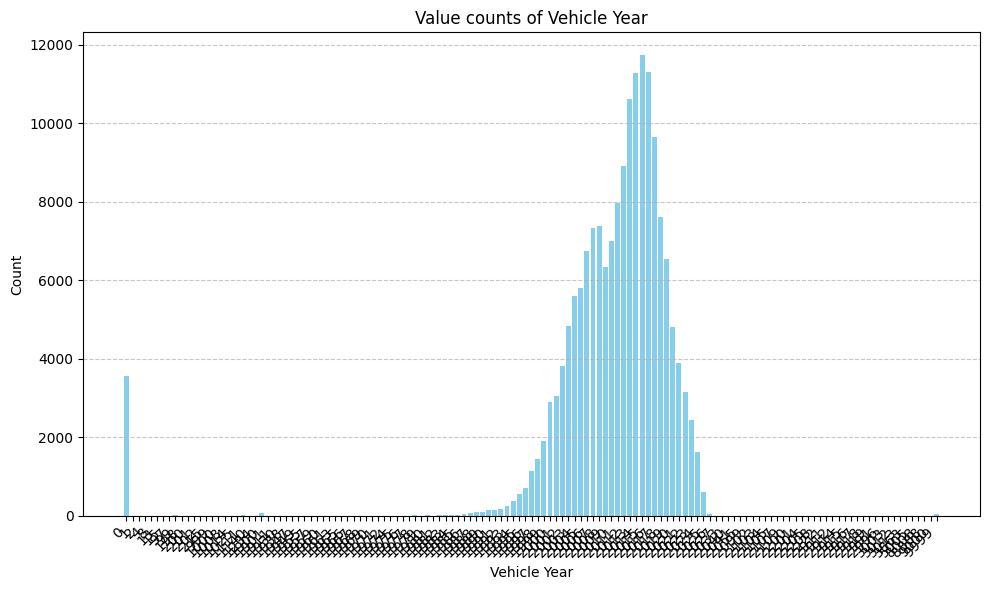

Plotting value counts for: Speed Limit


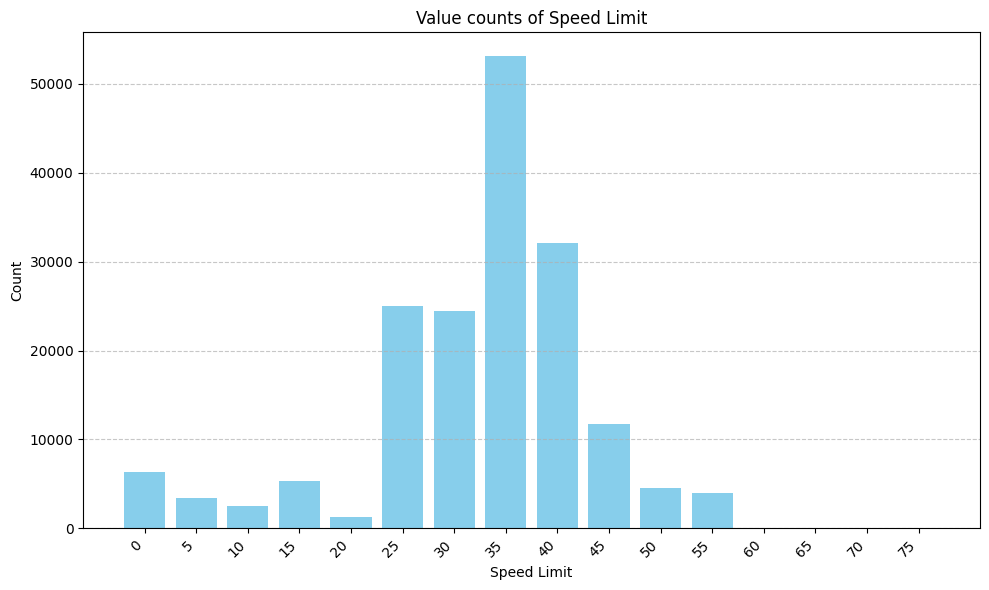

Plotting value counts for: Injury Severity


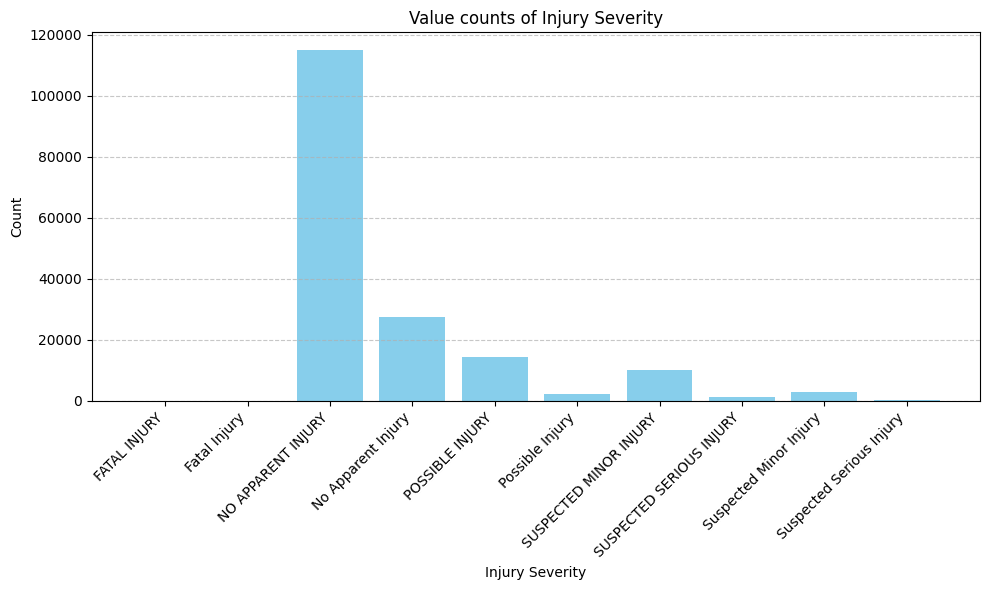

Plotting value counts for: Driver Substance Abuse


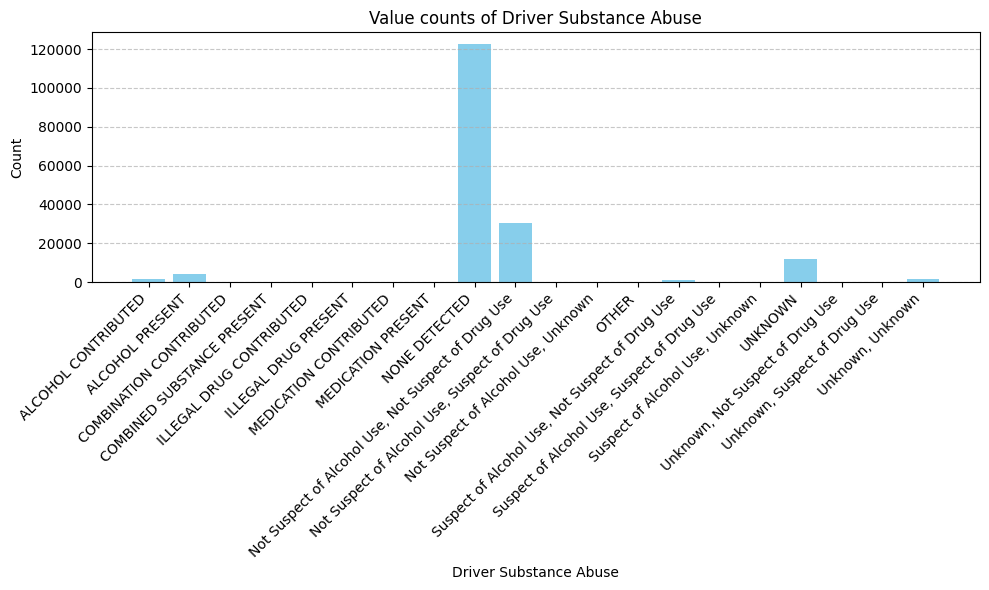

In [54]:
# List of columns to analyze
columns_to_analyze = ["Vehicle Year", "Speed Limit", "Injury Severity", "Driver Substance Abuse"]

# Loop over each column and plot its value counts
for col in columns_to_analyze:
    print(f"Plotting value counts for: {col}")
    plot_value_counts(bigbase_clean, variable=col)


We observe that the Vehicle Year variable contains implausible values, which will be removed from the dataset.

In [55]:
# Drop rows where Vehicle Year is less than 1920
bigbase_clean_step3 = bigbase_clean_step2[
    (bigbase_clean_step2['Vehicle Year'] >= 1950) &
    (bigbase_clean_step2['Vehicle Year'] <= 2025)
].copy()

# Vérification
print(f"Rows remaining after filtering Vehicle Year >= 1920: {len(bigbase_clean_step3)}")


Rows remaining after filtering Vehicle Year >= 1920: 170034


Let's plot again after this removal 

Plotting value counts for: Vehicle Year


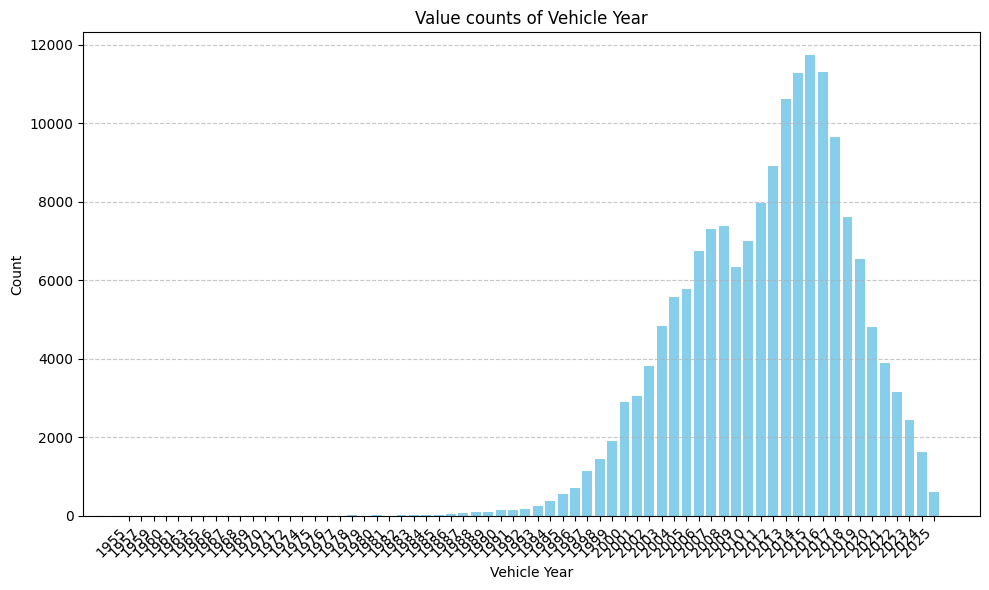

Plotting value counts for: Speed Limit


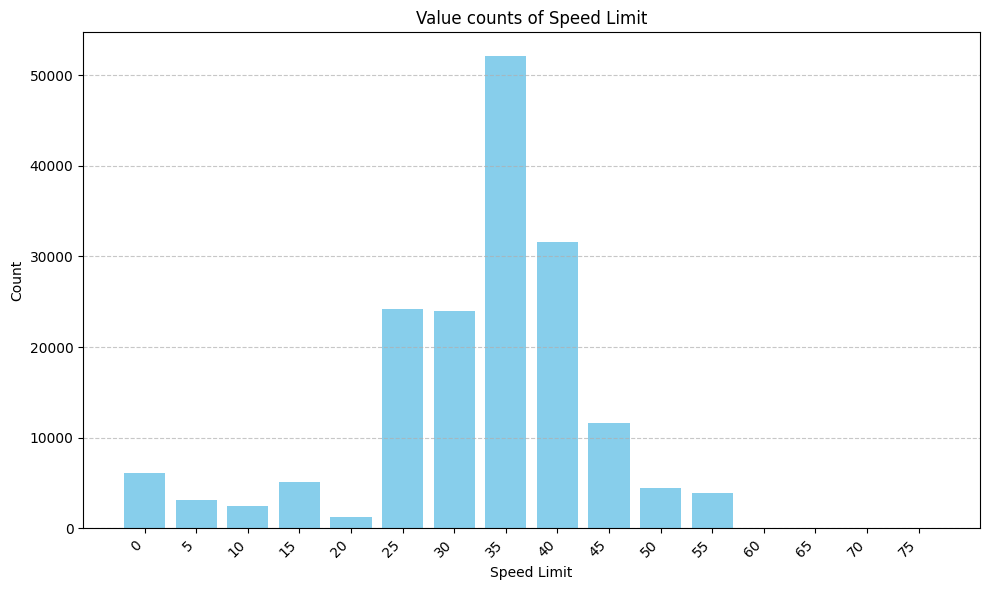

Plotting value counts for: Injury Severity


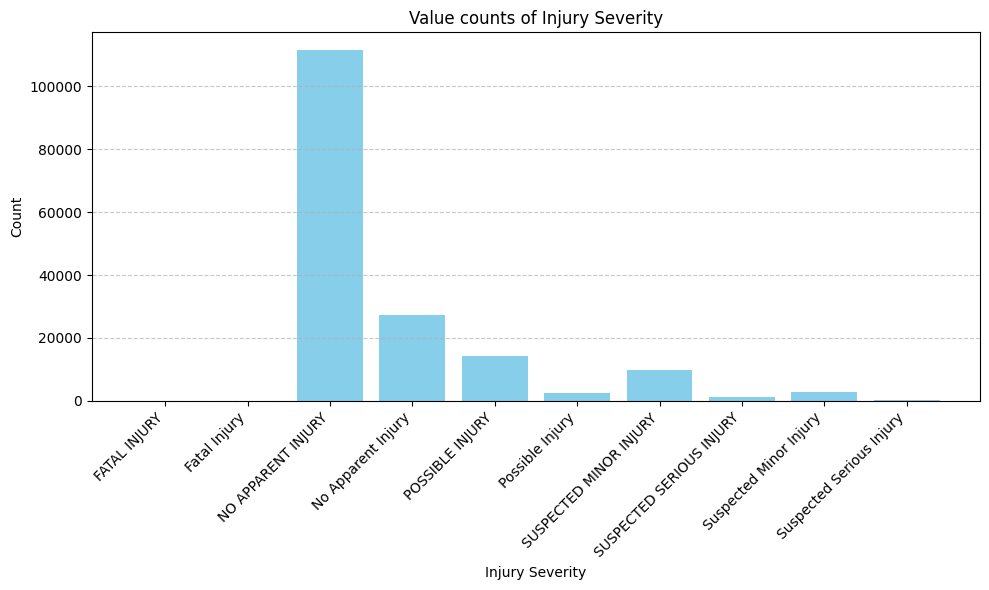

Plotting value counts for: Driver Substance Abuse


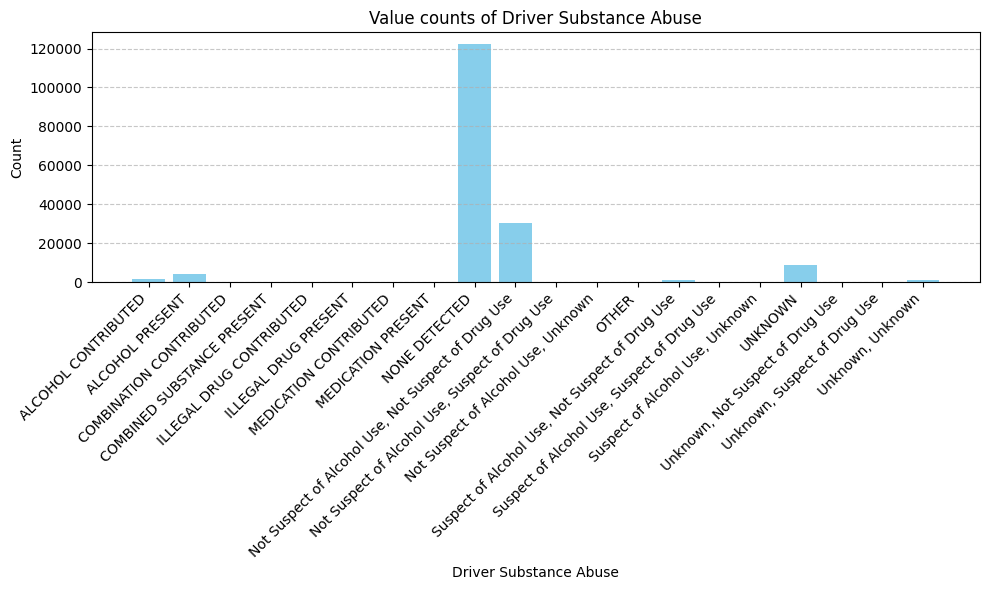

In [56]:
# List of columns to analyze
columns_to_analyze = ["Vehicle Year", "Speed Limit", "Injury Severity", "Driver Substance Abuse"]

# Loop over each column and plot its value counts
for col in columns_to_analyze:
    print(f"Plotting value counts for: {col}")
    plot_value_counts(bigbase_clean_step3, variable=col)


The implausible values have been successfully removed from the dataset.

In [57]:
# We can now have the final version of our big database : 

bigbase_final=bigbase_clean_step3

### I.2.iii Sampling <a id="sample"></a>


We will perform a sampling of the dataset to facilitate the integration of meteorological data. This step is necessary because the number of API requests is limited per hour, and working with a representative subset ensures efficient data enrichment.

In [58]:

# We want to extract a sample of 10000 lines to make sure the data can be used properly. 

n_samples = min(10000, len(bigbase_final))
bigbase_sample = bigbase_final.sample(n=n_samples, random_state=42)  
bigbase_sample.to_csv("Montgomery_sample.csv", index=False)

print("Shape original :", bigbase_sample.shape)
bigbase_sample.head(100)


Shape original : (10000, 39)


Report Number Local Case Number                Agency Name  \
110988    DD55380033         170523827  Rockville Police Departme   
53045     DD5635003Z         210032323  Rockville Police Departme   
196933   MCP3400001Z         250000408                 MONTGOMERY   
142787   MCP1235004R         230021859   Montgomery County Police   
64470    MCP29320024         180029283   Montgomery County Police   
...              ...               ...                        ...   
107514   MCP1382002P          16010765                 MONTGOMERY   
75062    MCP3122003K         200035046   Montgomery County Police   
34114    MCP1121002L         170521513   Montgomery County Police   
181322   MCP2455006Q         240015563                 MONTGOMERY   
158716   MCP2919004F         180008630   Montgomery County Police   

             ACRS Report Type         Crash Date/Time          Route Type  \
110988  Property Damage Crash  08/09/2017 08:32:00 AM        Municipality   
53045   Property Damage Crash  08/19/2021 04:00:00 PM    Maryland (State)   
196933  Property Damage Crash  01/03/2025 07:05:00 PM          US (State)   
142787           Injury Crash  05/07/2023 05:57:00 PM    Maryland (State)   
64470   Property Damage Crash  06/13/2018 09:20:00 PM    Maryland (State)   
...                       ...                     ...                 ...   
107514  Property Damage Crash  03/04/2016 07:35:00 AM                 NaN   
75062            Injury Crash  09/07/2020 02:40:00 PM    Maryland (State)   
34114            Injury Crash  07/27/2017 05:45:00 PM  Interstate (State)   
181322           Injury Crash  04/03/2024 04:15:00 PM        County Route   
158716  Property Damage Crash  02/19/2018 03:33:00 PM          US (State)   

                      Road Name Cross-Street Name  \
110988             WOOTTON PKWY    SEVEN LOCKS RD   
53045                NORBECK RD          AVERY RD   
196933     COLUMBIA PIKE (SB/L)               NaN   
142787        NEW HAMPSHIRE AVE    NORTHAMPTON DR   
64470               GEORGIA AVE          FLORA LA   
...                         ...               ...   
107514                      NaN               NaN   
75062                NORBECK RD    TWIN VALLEY CT   
34114   EISENHOWER MEMORIAL HWY  W MONTGOMERY AVE   
181322              PARKLAWN DR    WASHINGTON AVE   
158716            COLUMBIA PIKE       HILLWOOD DR   

                                     Off-Road Description Municipality  ...  \
110988                                                NaN    ROCKVILLE  ...   
53045                                                 NaN    ROCKVILLE  ...   
196933                                                NaN          NaN  ...   
142787                                                NaN          NaN  ...   
64470                                                 NaN          NaN  ...   
...                                                   ...          ...  ...   
107514  PARKING LOT OF 51 UNIVERSITY BLVD EAST SILVER ...          NaN  ...   
75062                                                 NaN          NaN  ...   
34114                                                 NaN          NaN  ...   
181322                                                NaN          NaN  ...   
158716                                                NaN          NaN  ...   

       Vehicle Going Dir Speed Limit Driverless Vehicle Parked Vehicle  \
110988              West          35                 No             No   
53045               East          50                 No             No   
196933        Southbound          55                 No             No   
142787             South          40                 No             No   
64470              North          35                 No             No   
...                  ...         ...                ...            ...   
107514              West           0                 No             No   
75062              North          35                 No             No   
3

## 2. Adding the weather to the sample dataset

We are using the free API of Open Weather, which provides weather data from 1940 until now. 
The API call has different parameters: some are required (latitude, longitude, start_date, end_date), and other are optional (elevation -to improve accuracy, apikey -required only for commercial use, hourly -a list of hourly weather variables which should be returned, daily -a list of daily weather variable aggregations which should be returned).

Limitations: Only for non-commercial use and less than 10.000 daily API calls.

## Hourly variables choosen (description below)
- weather_code (WMO code)
- temperature_2m (°C)
- precipitation (mm)
- snowfall (cm)
- relative_humidity_2m (%)

## Daily variables choosen (description below)
- sunrise
- sunset

## Linear regression (Mettre ceci plutôt dans le readme, ou dans la partie correspondante du NoteBook weather)
We are planning to regress the number of accident on :
- weather_code (WMO code) : a standarzed code between 1 and 99, depending on the weather -the higher it is, the harsher the weather is
- precipitation (mm) : Total precipitation (rain, showers, snow) sum of the preceding hour
- snowfall (cm) : Snowfall amount of the preceding hour in centimeters. For the water equivalent in millimeter, divide by 7. E.g. 7 cm snow = 10 mm precipitation water equivalent
- wind_speed_10m (km/h) : Wind speed at 10 or 100 meters above ground. Wind speed on 10 meters is the standard level.
- night (0 or 1 if it is the night) : this is a variable that we creates using the two daily variables sunrise and sunset

## Focus on the WMO
The conditions corresponding to the WMO code are described here: https://www.nodc.noaa.gov/archive/arc0021/0002199/1.1/data/0-data/HTML/WMO-CODE/WMO4677.HTM.

Weather icons illustration for each code are provided here: https://gist.github.com/stellasphere/9490c195ed2b53c707087c8c2db4ec0c

## DOCS for the Open Meteo
https://open-meteo.com/en/docs/historical-weather-api

### Reading the csv file with the data about car accident without weather

In [59]:
import pandas as pd
import os 

# Defining the columns to read
#usecols = ["...

# Read data with subset of columns

# if the file "completed_dataset_sample.csv" exists, we load it instead of the initial dataset, to avoid redoing already completed work
if os.path.exists("completed_dataset_sample.csv"):
    car_accidents_data = pd.read_csv("completed_dataset_sample.csv")
else:
    car_accidents_data = pd.read_csv("bigbase_sample_clean.csv") # usecols=usecols) to select specific columns

# Preview first 5 rows
car_accidents_data.head()

Unnamed: 0.8  Unnamed: 0.7  Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  \
0             0             0             0             0             0   
1             1             1             1             1             1   
2             2             2             2             2             2   
3             3             3             3             3             3   
4             4             4             4             4             4   

   Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 Report Number  ...  \
0             0             0             0           0   MCP3130004M  ...   
1             1             1             1           1   MCP29520027  ...   
2             2             2             2           2   MCP1048001D  ...   
3             3             3             3           3   MCP2667004Q  ...   
4             4             4             4           4   MCP3030003D  ...   

  weather_code precipitation snowfall wind_speed wind_direction  \
0         51.0           0.3      0.0  10.829959     285.422211   
1         63.0           3.2      0.0   4.320000     270.000000   
2          2.0           0.0      0.0   6.120000     241.927612   
3          3.0           0.0      0.0   3.319036     139.398788   
4         61.0           1.5      0.0  12.599998     323.130005   

  soil_temperature soil_moisture   sunrise    sunset day_or_night_code  
0        11.233001         0.459  05:35:00  18:42:00                 0  
1        21.872499         0.518  04:43:00  19:37:00                 0  
2         8.493999         0.439  06:28:00  18:09:00                 0  
3        15.491500         0.407  04:55:00  19:13:00                 0  
4        12.625000         0.506  05:04:00  19:06:00                 0  

[5 rows x 61 columns]

## Create squares 

In [60]:
def create_squares(df,lat,long,nb_sq_lat,nb_sq_long):
    lat_min = 38.934343
    lat_max = 39.353502
    lon_min = -77.52768
    lon_max = -76.888505
    grid_dict = {}
    
    # Compute the step sizes
    lat_step = (lat_max - lat_min) / nb_sq_lat
    lon_step = (lon_max - lon_min) / nb_sq_long
    
    for i in range(nb_sq_lat):
        for j in range(nb_sq_long):
            square_lat_min = lat_min + i * lat_step
            square_lat_max = lat_min + (i + 1) * lat_step
            square_lon_min = lon_min + j * lon_step
            square_lon_max = lon_min + (j + 1) * lon_step
            
            grid_dict[(i, j)] = (square_lat_min, square_lat_max, square_lon_min, square_lon_max)

    return grid_dict

create_squares(car_accidents_data,"Latitude","Longitude",3,3)


{(0, 0): (38.934343, 39.07406266666666, -77.52768, -77.31462166666667),
 (0, 1): (38.934343,
  39.07406266666666,
  -77.31462166666667,
  -77.10156333333333),
 (0, 2): (38.934343, 39.07406266666666, -77.10156333333333, -76.888505),
 (1, 0): (39.07406266666666,
  39.213782333333334,
  -77.52768,
  -77.31462166666667),
 (1, 1): (39.07406266666666,
  39.213782333333334,
  -77.31462166666667,
  -77.10156333333333),
 (1, 2): (39.07406266666666,
  39.213782333333334,
  -77.10156333333333,
  -76.888505),
 (2, 0): (39.213782333333334, 39.353502, -77.52768, -77.31462166666667),
 (2, 1): (39.213782333333334,
  39.353502,
  -77.31462166666667,
  -77.10156333333333),
 (2, 2): (39.213782333333334, 39.353502, -77.10156333333333, -76.888505)}

### Let's add for each line of the dataset in which square we are 

for each cell, we have to find in which square we are 

In [61]:
def find_square_from_grid(lat, lon, grid_dict):
    """
    Return the grid cell (i, j) containing the point (lat, lon).
    """
    for (i, j), (lat_min, lat_max, lon_min, lon_max) in grid_dict.items():
        if lat_min <= lat < lat_max and lon_min <= lon < lon_max:
            return (i, j)
    return None




ajouter au data set le numéro du carré

In [62]:
grid = create_squares(
    car_accidents_data,
    "Latitude",
    "Longitude",
    3,
    3
)


car_accidents_data['grid_cell'] = car_accidents_data.apply(
    lambda row: find_square_from_grid(
        row['Latitude'],
        row['Longitude'],
        grid
    ),
    axis=1
)
print(grid.keys())
car_accidents_data[['Latitude', 'Longitude', 'grid_cell']].head()



dict_keys([(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)])


Latitude  Longitude grid_cell
0  39.084912 -77.076068    (1, 2)
1  39.013298 -77.045822    (0, 2)
2  39.026372 -77.204397    (0, 1)
3  39.176243 -77.118350    (1, 1)
4  38.992689 -77.161965    (0, 1)

In [63]:
print(len(grid))
#print(grid[0])
print(grid)
print(grid.keys())

9
{(0, 0): (38.934343, 39.07406266666666, -77.52768, -77.31462166666667), (0, 1): (38.934343, 39.07406266666666, -77.31462166666667, -77.10156333333333), (0, 2): (38.934343, 39.07406266666666, -77.10156333333333, -76.888505), (1, 0): (39.07406266666666, 39.213782333333334, -77.52768, -77.31462166666667), (1, 1): (39.07406266666666, 39.213782333333334, -77.31462166666667, -77.10156333333333), (1, 2): (39.07406266666666, 39.213782333333334, -77.10156333333333, -76.888505), (2, 0): (39.213782333333334, 39.353502, -77.52768, -77.31462166666667), (2, 1): (39.213782333333334, 39.353502, -77.31462166666667, -77.10156333333333), (2, 2): (39.213782333333334, 39.353502, -77.10156333333333, -76.888505)}
dict_keys([(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)])


#### We provide a visual representation of the square to make sure our code works

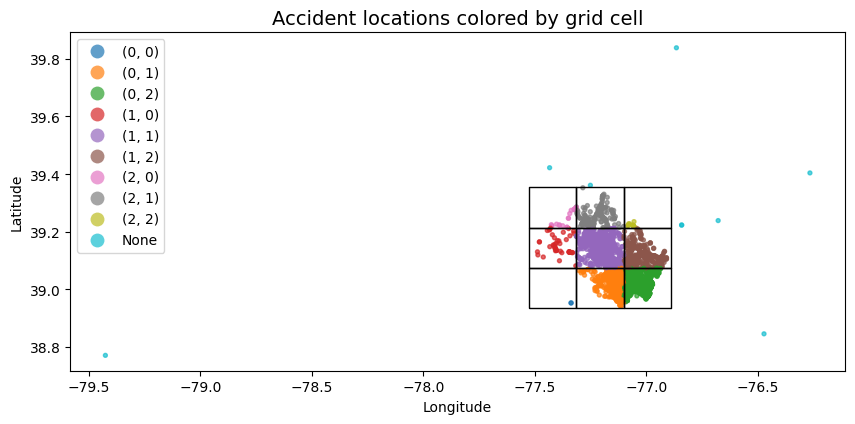

In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon


lat_min = 38.934343
lat_max = 39.353502
lon_min = -77.52768
lon_max = -76.888505
# Create geometry column from Latitude / Longitude
geometry = [
    Point(lon, lat)
    for lon, lat in zip(
        car_accidents_data['Longitude'],
        car_accidents_data['Latitude']
    )
]

gdf = gpd.GeoDataFrame(
    car_accidents_data,
    geometry=geometry,
    crs="EPSG:4326"
)

polygons = []
cells = []

for (i, j), (lat_min, lat_max, lon_min, lon_max) in grid.items():
    poly = Polygon([
        (lon_min, lat_min),
        (lon_max, lat_min),
        (lon_max, lat_max),
        (lon_min, lat_max)
    ])
    polygons.append(poly)
    cells.append(f"({i}, {j})")

grid_gdf = gpd.GeoDataFrame(
    {'grid_cell': cells},
    geometry=polygons,
    crs="EPSG:4326"
)

gdf['grid_cell_str'] = gdf['grid_cell'].astype(str)

fig, ax = plt.subplots(figsize=(10, 10))

# Plot grid boundaries
grid_gdf.boundary.plot(
    ax=ax,
    color='black',
    linewidth=1
)

# Plot accident points colored by grid cell
gdf.plot(
    ax=ax,
    column='grid_cell_str',
    cmap='tab10',
    markersize=8,
    legend=True,
    alpha=0.7
)

ax.set_title("Accident locations colored by grid cell", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


## Computing the average temperature for each square of the grid for each month

In [65]:
import openmeteo_requests
import pandas as pd
import requests_cache
from retry_requests import retry
from datetime import datetime, timezone, timedelta

url = "https://archive-api.open-meteo.com/v1/archive"

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)


#creer un tableau ca

def month_weather_api(latitude, longitude, start_date, end_date):
# on fournit la lat et long du centre du carré, et la date, afin d'obtenir.

# The order of variables in hourly or daily is important (to assign them correctly below)

    params = {
        "latitude": latitude,
        "longitude": longitude,
        "start_date": start_date,
        "end_date": end_date,
        "timezone": "UTC-5",
        "daily": [
        "temperature_2m_min",
        "temperature_2m_max",
        "temperature_2m_mean",
        "weather_code",
        "apparent_temperature_max",
        "apparent_temperature_min",
        "precipitation_sum",
        "rain_sum",
        "snowfall_sum",
        "precipitation_hours",
        "sunrise",
        "sunset",
        "sunshine_duration",
        "daylight_duration",
        "wind_speed_10m_max",
        "wind_gusts_10m_max",
        "wind_direction_10m_dominant",
        "shortwave_radiation_sum",
        "et0_fao_evapotranspiration"
    ]
    }

    responses = openmeteo.weather_api(url, params=params)
    #print(responses)

    response = responses[0]
    # Process daily data. The order of variables needs to be the same as requested.
    
    daily = response.Daily()
    #print(daily)

    daily_min_temp= daily.Variables(0).ValuesAsNumpy()
    daily_max_temp = daily.Variables(1).ValuesAsNumpy()
    daily_mean_temp = daily.Variables(2).ValuesAsNumpy()
    weather_code = daily.Variables(3).ValuesAsNumpy()
    apparent_temperature_max = daily.Variables(4).ValuesAsNumpy()
    apparent_temperature_min = daily.Variables(5).ValuesAsNumpy()
    precipitation_sum = daily.Variables(6).ValuesAsNumpy()
    rain_sum = daily.Variables(7).ValuesAsNumpy()
    snowfall_sum = daily.Variables(8).ValuesAsNumpy()
    precipitation_hours = daily.Variables(9).ValuesAsNumpy()
    sunrise = daily.Variables(10).ValuesInt64AsNumpy()
    sunset = daily.Variables(11).ValuesInt64AsNumpy()

    ## ou si on préfère avoir les données dans le format plus explicite: (on préfère garder le format précédent, en nombre de secondes écoulés depuis 1er janvier 1970)
    
    #raw_sunrise = daily.Variables(10).ValuesInt64AsNumpy()
    #raw_sunset = daily.Variables(11).ValuesInt64AsNumpy()

    #list_sunrise = raw_sunrise.tolist()
    #list_sunset = raw_sunset.tolist()

    #utc_minus_5 = timezone(timedelta(hours=-5))

    #sunrise = [datetime.fromtimestamp(e,tz=utc_minus_5).isoformat() for e in list_sunrise]
    
    #sunset = [datetime.fromtimestamp(e, tz=utc_minus_5).isoformat() for e in list_sunset]
    
    sunshine_duration = daily.Variables(12).ValuesAsNumpy()
    daylight_duration = daily.Variables(13).ValuesAsNumpy()
    wind_speed_10m_max = daily.Variables(14).ValuesAsNumpy()
    wind_gusts_10m_max = daily.Variables(15).ValuesAsNumpy()
    wind_direction_10m_dominant = daily.Variables(16).ValuesAsNumpy()
    shortwave_radiation_sum = daily.Variables(17).ValuesAsNumpy()
    et0_fao_evapotranspiration = daily.Variables(18).ValuesAsNumpy()

    daily_data = {"date": pd.date_range(
        start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
        end =  pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
        freq = pd.Timedelta(seconds = daily.Interval()),
        inclusive = "left"
    )}

    daily_data["temperature_2m_min"] = daily_min_temp
    daily_data["temperature_2m_max"] = daily_max_temp
    daily_data["temperature_2m_mean"] = daily_mean_temp
    daily_data["weather_code"] = weather_code
    daily_data["apparent_temperature_max"] = apparent_temperature_max
    daily_data["apparent_temperature_min"] = apparent_temperature_min
    daily_data["precipitation_sum"] = precipitation_sum
    daily_data["rain_sum"] = rain_sum
    daily_data["snowfall_sum"] = snowfall_sum
    daily_data["precipitation_hours"] = precipitation_hours
    daily_data["sunrise"] = sunrise
    daily_data["sunset"] = sunset
    daily_data["sunshine_duration"] = sunshine_duration
    daily_data["daylight_duration"] = daylight_duration
    daily_data["wind_speed_10m_max"] = wind_speed_10m_max
    daily_data["wind_gusts_10m_max"] = wind_gusts_10m_max
    daily_data["wind_direction_10m_dominant"] = wind_direction_10m_dominant
    daily_data["shortwave_radiation_sum"] = shortwave_radiation_sum
    daily_data["et0_fao_evapotranspiration"] = et0_fao_evapotranspiration

    return {"daily": daily_data}

#weather_api(52.52, 13.41, "2025-11-09", "2025-11-09")

#month_weather_api(39.2903848, -76.6121893, "2025-01-01", "2025-01-02")
#add_weather()


## pour le rapport:
# convertion du format iso8601 vers un autre pour le sunset et sunrise
# mise sous forme d'un dictonnaire de dictionnaires (un pour les hourly, un pour les daily (ici besoin que du daily, mais dans la fonction plus bas d'ajout de la météo au dataset on utilise les 2 types de données: hourly et daily))
# pas de vérification qu'on a pas de NaN dans l'appel car tous les problèmes ont été réglés à la main donc il n'y en a plus, mais ça pourrait être bien.



### Using the month_weather_api function to fill the array

In [66]:
cells = list(grid.keys())

nb_cells_col = (cells[-1])[1]+1 #pour calculer l'index des cellules

months_nb = 12
years = list(range(2014, 2026))
years_nb = len(years)

nb_variables = 19 #the number of variables that we stock for the monthly dataset

### Ne pas relancer ceci (les appels API pour récupérer les données brutes)

In [67]:
"""
import numpy as np
import calendar # to get the number of days in a month for the call of the month_weather_api
import time #for the .sleep()

cells = list(grid.keys())

nb_cells_col = (cells[-1])[1]+1 #pour calculer l'index des cellules

months_nb = 12
years = list(range(2014, 2026))
years_nb = len(years)

nb_variables = 19 #the number of variables that we stock for the monthly dataset

raw_data = np.zeros(
    (len(cells), months_nb, years_nb, nb_variables),
    dtype=list
)

for c in grid :
    cell_index = c[0]*nb_cells_col + c[1]
    # on calcule le centre de la cellule (lat, long)
    cell = grid[c]
    l1, l2, L1, L2 = cell [0], cell[1], cell[2], cell[3]
    lcenter, Lcenter = (l2 + l1)/2, (L2 + L1)/2
    print("Starting cell:", c)
    print("Central latitude:", lcenter)
    print("Central longitude:", Lcenter)

    for m in range(months_nb) :
        m_arg = str(m + 1)
        if m+1 < 10:
            m_arg = "0" + m_arg

        for y in years:

            y_index = 2025 - y #we obtain the index number, starting at 0 for 2025
            #print(y)
            #y_arg = str(y)[2] + str(y)[3]
            #print(y_arg)

            last_day = calendar.monthrange(y, m+1)[1] #+1 because month must be between 1 and 12 for the monthrange
            #print(last_day)

            start_date = str(y) + "-" + m_arg + "-" + "01"

            end_date = str(y) + "-" + m_arg + "-"  + str(last_day)
            
            if y == 2025 and m == 11 :
                end_date = "2025-12-19" #the historcal API only allow past data
        
            print(start_date)
            print(end_date)

            # etape 1: recuperer données brutes via la fonction
            raw_variables = month_weather_api(lcenter, Lcenter, start_date, end_date)
            
            daily_data = raw_variables["daily"]

            # etape 2: faire 3 list à partir des array avec le .tolist(), pour min, max, mean

            min_temp_list = daily_data['temperature_2m_min'].tolist()
            max_temp_list = daily_data['temperature_2m_max'].tolist()
            mean_temp_list = daily_data['temperature_2m_mean'].tolist()
                    
            weather_code_list = daily_data['weather_code'].tolist()

            apparent_temperature_max_list = daily_data['apparent_temperature_max'].tolist()
            apparent_temperature_min_list = daily_data['apparent_temperature_min'].tolist()

            precipitation_sum_list = daily_data['precipitation_sum'].tolist()
            rain_sum_list = daily_data['rain_sum'].tolist()
            snowfall_sum_list = daily_data['snowfall_sum'].tolist()

            precipitation_hours_list = daily_data['precipitation_hours'].tolist()

            sunrise_list = daily_data['sunrise'].tolist()
            sunset_list = daily_data['sunset'].tolist()
            
            sunshine_duration_list = daily_data['sunshine_duration'].tolist()
            daylight_duration_list = daily_data['daylight_duration'].tolist()

            wind_speed_10m_max_list = daily_data['wind_speed_10m_max'].tolist()
            wind_gusts_10m_max_list = daily_data['wind_gusts_10m_max'].tolist()
            wind_direction_10m_dominant_list = daily_data['wind_direction_10m_dominant'].tolist()

            shortwave_radiation_sum_list = daily_data['shortwave_radiation_sum'].tolist()
            et0_fao_evapotranspiration_list = daily_data['et0_fao_evapotranspiration'].tolist()

            raw_data[cell_index][m][y_index][0] = min_temp_list
            raw_data[cell_index][m][y_index][1] = max_temp_list
            raw_data[cell_index][m][y_index][2] = mean_temp_list

            raw_data[cell_index][m][y_index][3] = weather_code_list

            raw_data[cell_index][m][y_index][4] = apparent_temperature_max_list
            raw_data[cell_index][m][y_index][5] = apparent_temperature_min_list

            raw_data[cell_index][m][y_index][6] = precipitation_sum_list
            raw_data[cell_index][m][y_index][7] = rain_sum_list
            raw_data[cell_index][m][y_index][8] = snowfall_sum_list

            raw_data[cell_index][m][y_index][9] = precipitation_hours_list

            raw_data[cell_index][m][y_index][10] = sunrise_list
            raw_data[cell_index][m][y_index][11] = sunset_list

            raw_data[cell_index][m][y_index][12] = sunshine_duration_list
            raw_data[cell_index][m][y_index][13] = daylight_duration_list

            raw_data[cell_index][m][y_index][14] = wind_speed_10m_max_list
            raw_data[cell_index][m][y_index][15] = wind_gusts_10m_max_list
            raw_data[cell_index][m][y_index][16] = wind_direction_10m_dominant_list

            raw_data[cell_index][m][y_index][17] = shortwave_radiation_sum_list
            raw_data[cell_index][m][y_index][18] = et0_fao_evapotranspiration_list

            np.savez_compressed("raw_data_weather.npz",  allow_pickle=True, raw_data=raw_data)
            #print(raw_data)

    time.sleep(60)
    print("=========================")

# tableau de dimension 4

# avec un appel API (i.e. de la fonction month_weather_api), on remplit une ligne du tableau (une ligne annee)

# etape 2: faire 3 list à partir des array avec le .tolist(), pour min, max, mean

#data = np.load("raw_data.npz", allow_pickle=True)
#raw_data = data["raw_data"]
#print(raw_data)
"""


'\nimport numpy as np\nimport calendar # to get the number of days in a month for the call of the month_weather_api\nimport time #for the .sleep()\n\ncells = list(grid.keys())\n\nnb_cells_col = (cells[-1])[1]+1 #pour calculer l\'index des cellules\n\nmonths_nb = 12\nyears = list(range(2014, 2026))\nyears_nb = len(years)\n\nnb_variables = 19 #the number of variables that we stock for the monthly dataset\n\nraw_data = np.zeros(\n    (len(cells), months_nb, years_nb, nb_variables),\n    dtype=list\n)\n\nfor c in grid :\n    cell_index = c[0]*nb_cells_col + c[1]\n    # on calcule le centre de la cellule (lat, long)\n    cell = grid[c]\n    l1, l2, L1, L2 = cell [0], cell[1], cell[2], cell[3]\n    lcenter, Lcenter = (l2 + l1)/2, (L2 + L1)/2\n    print("Starting cell:", c)\n    print("Central latitude:", lcenter)\n    print("Central longitude:", Lcenter)\n\n    for m in range(months_nb) :\n        m_arg = str(m + 1)\n        if m+1 < 10:\n            m_arg = "0" + m_arg\n\n        for y in y

### Correction du type de sunrise et sunset (conversion numpy array --> list pour uniformisation)

In [68]:
from datetime import timezone, timedelta

data = np.load("full_raw_data_weather.npz", allow_pickle=True)
raw_data = data["raw_data"]
utc_minus_5 = timezone(timedelta(hours=-5))

for c in grid :
    cell_index = c[0]*nb_cells_col + c[1]
    # on calcule le centre de la cellule (lat, long)
    cell = grid[c]

    for m in range(months_nb) :

        # pour chacune des variables, on va faire la moyenne des valeurs sur tous les jours du mois, et sur toutes les années
        for y in years:
            y_index = 2025 - y

            list_sunrise = raw_data[cell_index][m][y_index][10].tolist()
            list_sunset = raw_data[cell_index][m][y_index][11].tolist()

            raw_data[cell_index][m][y_index][10] = list_sunrise # ou si conversion souhaitée: [datetime.fromtimestamp(e,tz=utc_minus_5).isoformat() for e in list_sunrise]
            raw_data[cell_index][m][y_index][11] = list_sunset # ou si conversion souhaitée:[datetime.fromtimestamp(e,tz=utc_minus_5).isoformat() for e in list_sunset]
            

np.savez_compressed("full_corrected_raw_data_weather.npz",  allow_pickle=True, raw_data=raw_data)

In [69]:
### Vérification que la correction a bien fonctionnée

data = np.load("full_corrected_raw_data_weather.npz", allow_pickle=True)
raw_data = data["raw_data"]

print(type(raw_data[1][2][5][11]))

<class 'list'>


### Calcul des moyennes à partir des données brutes contenues dans full_raw_data_weather.npz

In [70]:
data = np.load("full_corrected_raw_data_weather.npz", allow_pickle=True)
raw_data = data["raw_data"]

# creation du tableau permettant de sstocker les valeurs moyennes

# calculs des valeurs moyennes à partir des données brutes
### pour les variables qui nous intéressent:
## 1. Moyenne sur les jours de chaque mois
## 2. Moyenne sur les années de chaque mois
## on obtient les valeurs moyennes pour chaque mois, pour chaque variables, et ce pour chaque cellule de la grille

raw_data_average = np.zeros(
    (len(cells), months_nb, nb_variables),
    dtype=float
)

# calcul des valeurs

for c in grid :
    cell_index = c[0]*nb_cells_col + c[1]
    # on calcule le centre de la cellule (lat, long)
    cell = grid[c]

    for m in range(months_nb):
        m_arg = str(m + 1)
        if m+1 < 10:
            m_arg = "0" + m_arg

        # pour chacune des variables, on va faire la moyenne des valeurs sur tous les jours du mois, et sur toutes les années
        for i in range (0, 19):
            v_acccross_years = []

            for y in years:
                y_index = 2025 - y
                values = raw_data[cell_index][m][y_index][i]

                #if i == 10 or i == 11:
                #    mean = sum(values) / len(values)                            
                #else :
                
                mean = np.mean(raw_data[cell_index][m][y_index][i])

                v_acccross_years.append(mean)
                
            v_mean = np.mean(v_acccross_years)

            raw_data_average[cell_index][m][i] = v_mean
            
np.savez_compressed("full_months_average.npz",  allow_pickle=True, raw_data=raw_data)

## Documentation : Comment utiliser les valeurs moyennes par mois ?

In [71]:
# pour récupérer ce dataset, il suffit de faire :
data = np.load("full_months_average.npz", allow_pickle=True)
raw_data = data["raw_data"]

## et ensuite pour accéder à la valeur moyenne de la variable i du mois m de la case c:
raw_data_average[cell_index][m][i] = v_mean

# où m = 0 pour janvier, 11 pour décembre
# où cell_index est calculé avec : cell_index = c[0]*nb_cells_col + c[1] pour c in grid.keys()
# et où :
# i = 0  -> min_temp
# i = 1  -> max_temp
# i = 2  -> mean_temp
# i = 3  -> weather_code
# i = 4  -> apparent_temperature_max
# i = 5  -> apparent_temperature_min
# i = 6  -> precipitation_sum
# i = 7  -> rain_sum
# i = 8  -> snowfall_sum
# i = 9  -> precipitation_hours
# i = 10 -> sunrise
# i = 11 -> sunset
# i = 12 -> sunshine_duration
# i = 13 -> daylight_duration
# i = 14 -> wind_speed_10m_max
# i = 15 -> wind_gusts_10m_max
# i = 16 -> wind_direction_10m_dominant
# i = 17 -> shortwave_radiation_sum
# i = 18 -> et0_fao_evapotranspiration

##### Affichage des valeurs moyennes

In [104]:
for c in grid :
    cell_index = c[0]*nb_cells_col + c[1]
    # on calcule le centre de la cellule (lat, long)
    cell = grid[c]
    for m in range(months_nb):
        for i in range (0, 19):
            print(i,raw_data_average[cell_index][m][i])

0 -3.223999974908688
1 5.319951621124582
2 0.908056529486672
3 31.776881720430108
4 1.3310835733208604
5 -7.77318242672951
6 2.5803763881245616
7 1.8819892675445604
8 0.49395161019938616
9 3.4274193548387095
10 1563431106.9247313
11 1563466369.9623654
12 21096.771797590358
13 35262.4481686828
14 18.401449966174297
15 38.256773207777286
16 236.19903559838568
17 7.758360215412672
18 1.0896585007668824
0 -1.6823435735717502
1 8.315203505131603
2 3.0923971933766143
3 33.254002463054185
4 4.6444337820674
5 -6.012600337318795
6 2.9226908406452234
7 2.2916769158654833
8 0.4474928057033795
9 3.8022372742200328
10 1565989239.332307
11 1566027966.161741
12 23593.97752689493
13 38725.86223292859
14 18.437769592395558
15 39.3475850318453
16 225.1658940699765
17 10.55044338501048
18 1.5337182681316321
0 1.5553010808884775
1 12.878956687406344
2 7.033347798441286
3 29.16935483870968
4 9.5844933935391
5 -2.4650932050520376
6 2.806451665838399
7 2.3459677836827693
8 0.32422043258945143
9 3.39516129032

## Ajout de la météo au dataset des accidents

### Code using the API with a function (timezone "UTC-5") A DECOMMENTER 

In [73]:

import openmeteo_requests
import pandas as pd
import requests_cache
from retry_requests import retry
from datetime import datetime, timezone, timedelta

url = "https://archive-api.open-meteo.com/v1/archive"

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

def weather_api(latitude, longitude, start_date, end_date):
# Function to get weather data from OpenMeteo API
# Return a json with hourly and daily data

# The order of variables in hourly or daily is important (to assign them correctly below)

    params = {
        "latitude": latitude,
        "longitude": longitude,
        "start_date": start_date,
        "end_date": end_date,
        "timezone": "UTC-5",
        "hourly": ["temperature_2m", "apparent_temperature", "relative_humidity_2m", "weather_code", "precipitation", "snowfall", "wind_speed_10m", "wind_direction_10m", "soil_temperature_0_to_7cm", "soil_moisture_0_to_7cm", "shortwave_radiation", "direct_radiation", "direct_normal_irradiance", "diffuse_radiation", "global_tilted_irradiance", "sunshine_duration"],
        "daily": ["sunrise", "sunset"]
    }

    responses = openmeteo.weather_api(url, params=params)
    #print(responses)

    response = responses[0]

    #print(f"Coordinates: {response.Latitude()}°N {response.Longitude()}°E")
    #print(f"Elevation: {response.Elevation()} m asl")
    #print(f"Timezone difference to GMT+0: {response.UtcOffsetSeconds()}s")

    # Process hourly data. The order of variables needs to be the same as requested.
    hourly = response.Hourly()
    temperature = hourly.Variables(0).ValuesAsNumpy()
    apparent_temperature = hourly.Variables(1).ValuesAsNumpy()
    humidity = hourly.Variables(2).ValuesAsNumpy()
    weather_code = hourly.Variables(3).ValuesAsNumpy()
    precipitation = hourly.Variables(4).ValuesAsNumpy()
    snowfall = hourly.Variables(5).ValuesAsNumpy()
    wind_speed = hourly.Variables(6).ValuesAsNumpy()
    wind_direction = hourly.Variables(7).ValuesAsNumpy()
    soil_temperature = hourly.Variables(8).ValuesAsNumpy()
    soil_moisture = hourly.Variables(9).ValuesAsNumpy()
    shortwave_radiation = hourly.Variables(10).ValuesAsNumpy()
    direct_radiation = hourly.Variables(11).ValuesAsNumpy()
    direct_normal_irradiance = hourly.Variables(12).ValuesAsNumpy
    diffuse_radiation = hourly.Variables(13).ValuesAsNumpy()
    global_tilted_irradiance = hourly.Variables(14).ValuesAsNumpy
    sunshine_duration = hourly.Variables(15).ValuesAsNumpy()

    
    daily = response.Daily()

    daily_sunrise = daily.Variables(0).ValuesInt64AsNumpy()
    daily_sunset = daily.Variables(1).ValuesInt64AsNumpy()

    utc_minus_5 = timezone(timedelta(hours=-5))

    daily_sunrise= datetime.fromtimestamp(daily_sunrise[0],tz=utc_minus_5).isoformat()
    daily_sunset= datetime.fromtimestamp(daily_sunset[0], tz=utc_minus_5).isoformat()
    
    
    hourly_data = {"date": pd.date_range(
        start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
        end =  pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
        freq = pd.Timedelta(seconds = hourly.Interval()),
        inclusive = "left"
    )}

    hourly_data["temperature"] = temperature
    hourly_data["apparent_temperature"] = apparent_temperature
    hourly_data["humidity"] = humidity
    hourly_data["weather_code"] = weather_code
    hourly_data["precipitation"] = precipitation
    hourly_data["snowfall"] = snowfall
    hourly_data["wind_speed"] = wind_speed
    hourly_data["wind_direction"] = wind_direction
    hourly_data["soil_temperature"] = soil_temperature
    hourly_data["soil_moisture"] = soil_moisture
    
    """
    cette partie doit rester commentée 
    hourly_data["shortwave_radiation"] = shortwave_radiation
    hourly_data["direct_radiation"] = direct_radiation
    hourly_data["direct_normal_irradiance"] = direct_normal_irradiance
    hourly_data["diffuse_radiation"] = diffuse_radiation
    hourly_data["global_tilted_irradiance"] = global_tilted_irradiance
    hourly_data["sunshine_duration"] = sunshine_duration
    """
    
    daily_data = {"date": pd.date_range(
        start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
        end =  pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
        freq = pd.Timedelta(seconds = daily.Interval()),
        inclusive = "left"
    )}

    daily_data["sunrise"] = daily_sunrise
    daily_data["sunset"] = daily_sunset
    

    return {"hourly": hourly_data, "daily": daily_data}

#weather_api(52.52, 13.41, "2025-11-09", "2025-11-09")

weather_api(39.2903848, -76.6121893, "2025-01-01", "2025-01-20")
#add_weather()


{'hourly': {'date': DatetimeIndex(['2025-01-01 05:00:00+00:00', '2025-01-01 06:00:00+00:00',
                 '2025-01-01 07:00:00+00:00', '2025-01-01 08:00:00+00:00',
                 '2025-01-01 09:00:00+00:00', '2025-01-01 10:00:00+00:00',
                 '2025-01-01 11:00:00+00:00', '2025-01-01 12:00:00+00:00',
                 '2025-01-01 13:00:00+00:00', '2025-01-01 14:00:00+00:00',
                 ...
                 '2025-01-20 19:00:00+00:00', '2025-01-20 20:00:00+00:00',
                 '2025-01-20 21:00:00+00:00', '2025-01-20 22:00:00+00:00',
                 '2025-01-20 23:00:00+00:00', '2025-01-21 00:00:00+00:00',
                 '2025-01-21 01:00:00+00:00', '2025-01-21 02:00:00+00:00',
                 '2025-01-21 03:00:00+00:00', '2025-01-21 04:00:00+00:00'],
                dtype='datetime64[ns, UTC]', length=480, freq='h'),
  'temperature': array([ 7.85850000e+00,  8.35850048e+00,  8.45849991e+00,  7.95849991e+00,
          7.55849981e+00,  7.15849972e+00,  6.8084

### Function that add the weather data to the data set

In [74]:

import time
import os
"""
# if the file "completed_dataset_sample.csv" exists, we load it instead of the initial dataset, to avoid redoing already completed work
if os.path.exists("completed_dataset_sample.csv"):
    car_accidents_data = pd.read_csv("completed_dataset_sample.csv") # usecols=usecols) to select specific columns
else:
    car_accidents_data = pd.read_csv("bigbase_sample_clean.csv") # usecols=usecols) to select specific columns

def add_weather():
    n = len(car_accidents_data)

    # adding weather columns to car_accidents_data

    weather_columns_hourly = [
        "temperature",
        "apparent_temperature",
        "humidity",
        "weather_code",
        "precipitation",
        "snowfall",
        "wind_speed",
        "wind_direction",
        "soil_temperature",
        "soil_moisture"
    ]

    weather_columns_daily = [
        "sunrise",
        "sunset",
        "day_or_night_code"]
    
    weather_columns = weather_columns_hourly + weather_columns_daily

    new_data = {col: [None] * n for col in weather_columns}
    for col, values in new_data.items():
        if col not in car_accidents_data.columns: # to avoid overwriting existing columns with data coming form previous runs
            car_accidents_data[col] = values
    
    #show the full updated dataframe
    #print("Updated car_accidents_data with new weather columns:")
    #print(car_accidents_data.head())
    
    j, k = 0, 0

    start_time = time.perf_counter()
    for i in range(0,n):
        j+=1
        print(f"Processing row {i}, meaning row {j} of the {k} series, out of {n}")
        latitude = car_accidents_data.iloc[i]['Latitude']
        longitude = car_accidents_data.iloc[i]['Longitude']
        date_time = car_accidents_data.iloc[i]['Crash Date/Time']

        date = date_time.split(" ")[0]
        accident_time = date_time.split(" ")[1] #useless
        

        hour = date_time.split(" ")[1].split(":")[0]
        time_of_day = date_time.split(" ")[2]
        time_minutes = date_time.split(" ")[1].split(":")[1]

        time_index = int(hour) # index starts at 0 for midnight, so 1am = 1, 2am = 2, ..., 12pm = 12, 1pm = 13, ..., 11pm = 23

        if time_of_day == "PM" and hour != "12":
            time_index += 12
        elif time_of_day == "AM" and hour == "12":
            time_index = 0

        if time_minutes < "30":
            time_index += 0
        elif int(hour) < 11 :
            time_index += 1

        #print(f"Fetching weather data for row {i} (ID: {car_accidents_data.index[i]}) at coordinates: {latitude}, {longitude}")
        #print(f"Crash Date/Time: {date_time}")
        print(f"Parsed Date: {date}, Time: {accident_time}, Hour: {hour}, Time of Day: {time_of_day}, Time Minutes: {time_minutes}")
        #print(f"Computed Time Index for hourly data: {time_index}")

        date_conversion = pd.to_datetime(date)
        date_for_api = date_conversion.strftime("%Y-%m-%d")
        #print(f"Formatted Date for API: {date_for_api}")

        weather_data = weather_api(latitude, longitude, date_for_api, date_for_api)

        # Extract hourly weather data for the specific hour of the crash
        hourly_data = weather_data["hourly"]
        daily_data = weather_data["daily"]

        #print(hourly_data)
        #print('Daily data:')
        #print(daily_data)

        for col in weather_columns_hourly:
            if col in hourly_data:
                print("Time index:", time_index)
                car_accidents_data.at[i, col] = hourly_data[col][time_index]
                #print(f"Assigned {col} value: {hourly_data[col][time_index]} to row {i} (ID: {car_accidents_data.index[i]})")
            else:
                print(f"Warning: {col} not found in hourly data for row {i} (ID: {car_accidents_data.index[i]})")
            
        col = "day_or_night_code"
        if "sunrise" in daily_data and "sunset" in daily_data:
            sunrise_time = daily_data["sunrise"]
            #print(f"Sunrise time: {sunrise_time}")
            sunrise_time_list = sunrise_time.split("T")[1].split(":")[0:2]
            sunrise_time_h, sunrise_time_m = sunrise_time_list[0], sunrise_time_list[1]
            #print(f"Sunrise time (hour) and minute): {sunrise_time_h} {sunrise_time_m}")

            sunrise_time_hm = sunrise_time_h + ":" + sunrise_time_m + ":00"

            sunset_time = daily_data["sunset"]
            sunset_time_list = sunset_time.split("T")[1].split(":")[0:2]
            sunset_time_h, sunset_time_m = sunset_time_list[0], sunset_time_list[1]
            #print(f"Sunset time (hour and minute): {sunset_time_h} {sunset_time_m}")

            sunset_time_hm = sunset_time_h + ":" + sunset_time_m + ":00"

            if time_of_day == "PM" and hour != "12":
                accident_hour_24h = int(hour) + 12
            elif time_of_day == "AM" and hour == "12":
                accident_hour_24h = 00
            else :
                accident_hour_24h = int(hour)

            if accident_hour_24h < 10:
                accident_hour_24h = "0" + str(accident_hour_24h)
            accident_time_24h = str(accident_hour_24h) + ":" + time_minutes + ":00"

            if sunrise_time_hm <= accident_time_24h <= sunset_time_hm:
                #print(f"Crash time {time} is during the day (between {sunrise_time_hm} and {sunset_time_hm})")
                car_accidents_data.at[i, col] = "0"
            else:
                #print(f"Crash time {time} is during the night (outside {sunrise_time_hm} and {sunset_time_hm})")
                car_accidents_data.at[i, col] = "1"
            
            #print(f"Assigned {col} value: {car_accidents_data.at[i, col]} to row {i} (ID: {car_accidents_data.index[i]})")

            # we add the sunrise and sunset times to the dataframe, because it could be useful later to identify crashes at times close to sunrise/sunset
            car_accidents_data.at[i, "sunrise"] = sunrise_time_hm
            car_accidents_data.at[i, "sunset"] = sunset_time_hm
        else:
            print(f"Warning: sunrise or sunset not found in daily data for row {i} (ID: {car_accidents_data.index[i]})")
        
        if j > 300 :
            # Update the CSV file after each batch of 550 requests
            #car_accidents_data.to_csv("completed_dataset_sample.csv")

            end_time = time.perf_counter()
            elapsed = end_time - start_time
            print(f"Elapsed time for 550 requests: {elapsed} seconds")

            time.sleep(120) # to respect rate limit of 600 requests per minute (with a security margin of 4 seconds)
            j = 0
            k += 1
            start_time = time.perf_counter()

    # Saving the dataframe as a csv file

    # Export the file to the current working directory
    #car_accidents_data.to_csv("completed_dataset_sample.csv")

    return

add_weather()

"""

'\n# if the file "completed_dataset_sample.csv" exists, we load it instead of the initial dataset, to avoid redoing already completed work\nif os.path.exists("completed_dataset_sample.csv"):\n    car_accidents_data = pd.read_csv("completed_dataset_sample.csv") # usecols=usecols) to select specific columns\nelse:\n    car_accidents_data = pd.read_csv("bigbase_sample_clean.csv") # usecols=usecols) to select specific columns\n\ndef add_weather():\n    n = len(car_accidents_data)\n\n    # adding weather columns to car_accidents_data\n\n    weather_columns_hourly = [\n        "temperature",\n        "apparent_temperature",\n        "humidity",\n        "weather_code",\n        "precipitation",\n        "snowfall",\n        "wind_speed",\n        "wind_direction",\n        "soil_temperature",\n        "soil_moisture"\n    ]\n\n    weather_columns_daily = [\n        "sunrise",\n        "sunset",\n        "day_or_night_code"]\n\n    weather_columns = weather_columns_hourly + weather_columns_da

In [75]:
car_accidents_data.head()

Unnamed: 0.8  Unnamed: 0.7  Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  \
0             0             0             0             0             0   
1             1             1             1             1             1   
2             2             2             2             2             2   
3             3             3             3             3             3   
4             4             4             4             4             4   

   Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 Report Number  ...  \
0             0             0             0           0   MCP3130004M  ...   
1             1             1             1           1   MCP29520027  ...   
2             2             2             2           2   MCP1048001D  ...   
3             3             3             3           3   MCP2667004Q  ...   
4             4             4             4           4   MCP3030003D  ...   

  precipitation snowfall wind_speed wind_direction soil_temperature  \
0           0.3      0.0  10.829959     285.422211        11.233001   
1           3.2      0.0   4.320000     270.000000        21.872499   
2           0.0      0.0   6.120000     241.927612         8.493999   
3           0.0      0.0   3.319036     139.398788        15.491500   
4           1.5      0.0  12.599998     323.130005        12.625000   

  soil_moisture   sunrise    sunset day_or_night_code grid_cell  
0         0.459  05:35:00  18:42:00                 0    (1, 2)  
1         0.518  04:43:00  19:37:00                 0    (0, 2)  
2         0.439  06:28:00  18:09:00                 0    (0, 1)  
3         0.407  04:55:00  19:13:00                 0    (1, 1)  
4         0.506  05:04:00  19:06:00                 0    (0, 1)  

[5 rows x 62 columns]

### Correction of the day_or_night_code column to take PM into account

In [76]:
if os.path.exists("completed_dataset_sample.csv"):
    car_accidents_data = pd.read_csv("completed_dataset_sample.csv") # usecols=usecols) to select specific columns
else:
    print("The file does not exist.")

n = len(car_accidents_data)
for i in range(0,n):

    date_time = car_accidents_data.iloc[i]['Crash Date/Time']

    accident_time = date_time.split(" ")[1] #useless
    hour = date_time.split(" ")[1].split(":")[0]
    time_of_day = date_time.split(" ")[2]
    time_minutes = date_time.split(" ")[1].split(":")[1]

    if time_of_day == "PM" and hour != "12":
        accident_hour_24h = int(hour) + 12
    elif time_of_day == "AM" and hour == "12":
        accident_hour_24h = 00
    else :
        accident_hour_24h = int(hour)

    if accident_hour_24h < 10:
        accident_hour_24h = "0" + str(accident_hour_24h)
    accident_time_24h = str(accident_hour_24h) + ":" + time_minutes + ":00"

    sunrise_time = car_accidents_data.iloc[i]['sunrise']
    sunset_time = car_accidents_data.iloc[i]['sunset']

    if sunrise_time <= accident_time_24h <= sunset_time:
        car_accidents_data.at[i, "day_or_night_code"] = "0"
        print(f"Daytime crash at row {i}: accident time {accident_time_24h}, sunrise {sunrise_time}, sunset {sunset_time}")
    else:
        car_accidents_data.at[i, "day_or_night_code"] = "1"
        print(f"Nighttime crash at row {i}: accident time {accident_time_24h}, sunrise {sunrise_time}, sunset {sunset_time}")
    
   #print(f"Processed row {i} out of {n}")

car_accidents_data.head()
car_accidents_data.to_csv("completed_dataset_sample.csv")

C:\Users\33783\AppData\Local\Temp\ipykernel_3164\1289435743.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  car_accidents_data.at[i, "day_or_night_code"] = "0"


Daytime crash at row 0: accident time 07:40:00, sunrise 05:35:00, sunset 18:42:00
Daytime crash at row 1: accident time 10:35:00, sunrise 04:43:00, sunset 19:37:00
Daytime crash at row 2: accident time 07:00:00, sunrise 06:28:00, sunset 18:09:00
Daytime crash at row 3: accident time 06:55:00, sunrise 04:55:00, sunset 19:13:00
Daytime crash at row 4: accident time 15:02:00, sunrise 05:04:00, sunset 19:06:00
Daytime crash at row 5: accident time 14:01:00, sunrise 06:18:00, sunset 18:16:00
Daytime crash at row 6: accident time 10:35:00, sunrise 05:04:00, sunset 19:07:00
Daytime crash at row 7: accident time 08:20:00, sunrise 07:17:00, sunset 17:26:00
Daytime crash at row 8: accident time 13:53:00, sunrise 05:45:00, sunset 18:36:00
Daytime crash at row 9: accident time 12:08:00, sunrise 05:36:00, sunset 18:41:00
Daytime crash at row 10: accident time 15:57:00, sunrise 07:24:00, sunset 17:11:00
Daytime crash at row 11: accident time 15:25:00, sunrise 07:27:00, sunset 17:06:00
Daytime crash 

## Drafts part

In [77]:
raw_variables = month_weather_api(lcenter, Lcenter, start_date, end_date)
            
daily_data = raw_variables["daily"]

sunrise = daily_data['sunrise']
sunset= daily_data['sunset']

print(type(sunrise))
print(sunrise)

NameError: name 'lcenter' is not defined

### Code to use the API manually (not required in the final version of the project)

In [78]:
import openmeteo_requests

import pandas as pd
import requests_cache
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 52.52,
	"longitude": 13.41,
	"start_date": "2025-11-09",
	"end_date": "2025-11-11",
	"hourly": ["temperature_2m", "relative_humidity_2m", "weather_code", "precipitation", "snowfall" ],
    "daily": ["sunrise", "sunset"]
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates: {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation: {response.Elevation()} m asl")
print(f"Timezone difference to GMT+0: {response.UtcOffsetSeconds()}s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
weather_code = hourly.Variables(2).ValuesAsNumpy()
precipitation = hourly.Variables(3).ValuesAsNumpy()
snowfall = hourly.Variables(4).ValuesAsNumpy()

daily = response.Daily()
daily_sunrise = daily.Variables(0).ValuesAsNumpy()
daily_sunset = daily.Variables(1).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end =  pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["weather_code"] = weather_code
hourly_data["precipitation"] = precipitation
hourly_data["snowfall"] = snowfall

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end =  pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}

daily_data["sunrise"] = daily_sunrise
daily_data["sunset"] = daily_sunset

hourly_dataframe = pd.DataFrame(data = hourly_data)
print("\nHourly data\n", hourly_dataframe)

daily_dataframe = pd.DataFrame(data = daily_data)
print("\nDaily data\n", daily_dataframe)


Coordinates: 52.5483283996582°N 13.407821655273438°E
Elevation: 38.0 m asl
Timezone difference to GMT+0: 0s

Hourly data
                         date  temperature_2m  relative_humidity_2m  \
0  2025-11-09 00:00:00+00:00          2.3585            100.000000   
1  2025-11-09 01:00:00+00:00          1.5585             99.286285   
2  2025-11-09 02:00:00+00:00          1.6585             97.174431   
3  2025-11-09 03:00:00+00:00          1.4085             99.642143   
4  2025-11-09 04:00:00+00:00          1.3085             98.574203   
..                       ...             ...                   ...   
67 2025-11-11 19:00:00+00:00          7.6085             96.641724   
68 2025-11-11 20:00:00+00:00          6.9585             96.957458   
69 2025-11-11 21:00:00+00:00          6.5085             96.946640   
70 2025-11-11 22:00:00+00:00          6.5085             96.946640   
71 2025-11-11 23:00:00+00:00          6.6585             96.950264   

    weather_code  precipitation  snow

### Let's create new variables taking into account the average value we collected

Let $X$ denote a variable obtained from the API calls.
Let $\bar{X}$ denote the average we found using the API calls. 

We introduce the normalized variable $\tilde{X}$, defined by $\tilde{X} = \frac{X - \bar{X}}{\bar{X}}$.


CELLULE TEMPORAIRE : DATASET AVEC DONNEES METEO

In [79]:
dataset = pd.read_csv("completed_dataset_sample.csv").copy()

grid = create_squares(
    dataset,
    "Latitude",
    "Longitude",
    3,
    3
)


dataset['grid_cell'] = dataset.apply(
    lambda row: find_square_from_grid(
        row['Latitude'],
        row['Longitude'],
        grid
    ),
    axis=1
)
print(grid.keys())
dataset[['Latitude', 'Longitude', 'grid_cell']].head()
dataset = dataset[dataset['grid_cell'].notna()]


dict_keys([(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)])


In [80]:
c=(0,1)
cell_index = c[0]*nb_cells_col + c[1]

print(cell_index)
print(raw_data_average[cell_index][7][2])




1
23.9908642461223


In [105]:
import pandas as pd
import numpy as np

# ================================
# 1. Conversion de la date en datetime
# ================================
dataset['Crash Date/Time'] = pd.to_datetime(dataset['Crash Date/Time'], errors='coerce')


API_Columns = [
    ("temperature", 2),
    ("precipitation", 6),
    ("snowfall", 8),("wind_speed",14)
]

for column_name, var_idx in API_Columns:
    var_name = f"{column_name}_normalized"
    dataset[var_name] = np.nan  # initialiser avec NaN
    
    for index, row in dataset.iterrows():
        month_idx = row['Crash Date/Time'].month - 1
        i, j = row['grid_cell']
        cell_index = i * nb_cells_col + j
        
        # Valeur moyenne provenant de raw_data_average
        mean = raw_data_average[cell_index][month_idx][var_idx]
        
        # Valeur locale et normalisée
        local_value = row[column_name]
        local_value_normalized = (local_value - mean) / mean
        
        # Affecter uniquement à la ligne actuelle
        dataset.at[index, var_name] = local_value_normalized

dataset.head()



C:\Users\33783\AppData\Local\Temp\ipykernel_3164\3298542994.py:30: RuntimeWarning: invalid value encountered in scalar divide
  local_value_normalized = (local_value - mean) / mean


Unnamed: 0.9  Unnamed: 0.8  Unnamed: 0.7  Unnamed: 0.6  Unnamed: 0.5  \
0             0             0             0             0             0   
1             1             1             1             1             1   
2             2             2             2             2             2   
3             3             3             3             3             3   
4             4             4             4             4             4   

   Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  ...  \
0             0             0             0             0           0  ...   
1             1             1             1             1           1  ...   
2             2             2             2             2           2  ...   
3             3             3             3             3           3  ...   
4             4             4             4             4           4  ...   

  snowfall_normalized temperature_normalized_year  \
0                -1.0                    0.048932   
1                 NaN                    0.596122   
2                -1.0                   -0.431936   
3                 NaN                    0.125817   
4                 NaN                   -0.112169   

  temperature_normalized_year_abs precipitation_normalized_year  \
0                        0.048932                     -0.918407   
1                        0.596122                     -0.122785   
2                        0.431936                     -1.000000   
3                        0.125817                     -1.000000   
4                        0.112169                     -0.583701   

  precipitation_normalized_year_abs snowfall_normalized_year  \
0                          0.918407                     -1.0   
1                          0.122785                     -1.0   
2                          1.000000                     -1.0   
3                          1.000000                     -1.0   
4                          0.583701                     -1.0   

  snowfall_normalized_year_abs month injury_severity_num wind_speed_normalized  
0                          1.0     4                 0.0             -0.427309  
1                          1.0     6                 1.0             -0.719103  
2                          1.0     3                 0.0             -0.685417  
3                          1.0     5                 1.0             -0.790605  
4                          1.0     5                 0.0             -0.209879  

[5 rows x 75 columns]

ajout de la version où la moyenne est la moyenne annuelle 

In [106]:
import pandas as pd
import numpy as np

# ================================
# 1. Conversion de la date en datetime
# ================================
dataset['Crash Date/Time'] = pd.to_datetime(dataset['Crash Date/Time'], errors='coerce')

API_Columns = [
    ("temperature", 2),
    ("precipitation", 6),
    ("snowfall", 8),("wind_speed",14)
]

annual_average = {}  

for column_name, var_idx in API_Columns:
    var_name = f"{column_name}_normalized_year"
    var_name_abs = f"{column_name}_normalized_year_abs"

    dataset[var_name] = np.nan  # initialiser la colonne
    dataset[var_name_abs] = np.nan

    # Calculer la moyenne annuelle par cellule, stockée par cell_index
    annual_average[column_name] = {}  # dictionnaire : key=cell_index, value=moyenne annuelle
    for c in grid:
        i_cell, j_cell = c
        cell_index = i_cell * nb_cells_col + j_cell
        monthly_values = [raw_data_average[cell_index][month][var_idx] for month in range(12)]
        mean_annual = np.mean(monthly_values)

        annual_average[column_name][cell_index] = mean_annual

# Vérifions le dictionnaire
print(annual_average)

# Normalisation des valeurs dans le dataset
for column_name, var_idx in API_Columns:
    var_name = f"{column_name}_normalized_year"
    var_name_abs = f"{column_name}_normalized_year_abs"

    for index, row in dataset.iterrows():
        i, j = row['grid_cell']
        cell_index = i * nb_cells_col + j

        local_value = row[column_name]
        mean_annual = annual_average[column_name].get(cell_index, np.nan)  # sécuriser
        
        # Normalisation par rapport à la moyenne annuelle
        local_value_normalized = (local_value - mean_annual)/mean_annual 
        dataset.at[index, var_name] = local_value_normalized
        dataset.at[index, var_name_abs] = abs(local_value_normalized)

dataset.head()


{'temperature': {0: np.float64(13.649465702086333), 1: np.float64(13.544248039343222), 2: np.float64(13.609548994006772), 3: np.float64(13.292457370993667), 4: np.float64(13.138453463261042), 5: np.float64(12.997028153088914), 6: np.float64(13.092095491711639), 7: np.float64(12.432053887904445), 8: np.float64(12.754560413068821)}, 'precipitation': {0: np.float64(3.2639154219967152), 1: np.float64(3.6031785539885526), 2: np.float64(3.6479081149152637), 3: np.float64(3.3218031366655736), 4: np.float64(3.387201092684973), 5: np.float64(3.6767922672748408), 6: np.float64(3.212758184032244), 7: np.float64(3.472699606235403), 8: np.float64(3.5590229083669076)}, 'snowfall': {0: np.float64(0.12003232259971519), 1: np.float64(0.1162235181027131), 2: np.float64(0.11190084103412627), 3: np.float64(0.12610007504187112), 4: np.float64(0.12653295592420896), 5: np.float64(0.12705135028645773), 6: np.float64(0.13113914520088568), 7: np.float64(0.14525565493925052), 8: np.float64(0.13804388020331723)},

Unnamed: 0.9  Unnamed: 0.8  Unnamed: 0.7  Unnamed: 0.6  Unnamed: 0.5  \
0             0             0             0             0             0   
1             1             1             1             1             1   
2             2             2             2             2             2   
3             3             3             3             3             3   
4             4             4             4             4             4   

   Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  ...  \
0             0             0             0             0           0  ...   
1             1             1             1             1           1  ...   
2             2             2             2             2           2  ...   
3             3             3             3             3           3  ...   
4             4             4             4             4           4  ...   

  temperature_normalized_year_abs precipitation_normalized_year  \
0                        0.048932                     -0.918407   
1                        0.596122                     -0.122785   
2                        0.431936                     -1.000000   
3                        0.125817                     -1.000000   
4                        0.112169                     -0.583701   

  precipitation_normalized_year_abs snowfall_normalized_year  \
0                          0.918407                     -1.0   
1                          0.122785                     -1.0   
2                          1.000000                     -1.0   
3                          1.000000                     -1.0   
4                          0.583701                     -1.0   

  snowfall_normalized_year_abs month injury_severity_num  \
0                          1.0     4                 0.0   
1                          1.0     6                 1.0   
2                          1.0     3                 0.0   
3                          1.0     5                 1.0   
4                          1.0     5                 0.0   

  wind_speed_normalized wind_speed_normalized_year  \
0             -0.427309                  -0.336294   
1             -0.719103                  -0.738534   
2             -0.685417                  -0.629414   
3             -0.790605                  -0.797938   
4             -0.209879                  -0.237028   

  wind_speed_normalized_year_abs  
0                       0.336294  
1                       0.738534  
2                       0.629414  
3                       0.797938  
4                       0.237028  

[5 rows x 77 columns]

In [107]:
# Mois d'août = 8
mois_cible = 6

# Filtrer le dataset pour le mois d'août
dataset_aout = dataset[dataset['Crash Date/Time'].dt.month == mois_cible].copy()

# Ajouter une colonne pour l'écart à la moyenne annuelle
dataset_aout['temperature_diff_annual'] = dataset_aout.apply(
    lambda row: row['temperature'] - annual_average['temperature'].get(row['grid_cell'][0]*nb_cells_col + row['grid_cell'][1], np.nan),
    axis=1
)

dataset_aout['temperature_diff_annual2'] = dataset_aout.apply(
    lambda row: row['temperature_normalized_year'] if pd.notnull(row['temperature_normalized_year']) else np.nan,
    axis=1
)

# Afficher les premières lignes
print(dataset_aout[['Crash Date/Time', 'grid_cell', 'temperature', 'temperature_diff_annual','temperature_diff_annual2']].head())


       Crash Date/Time grid_cell  temperature  temperature_diff_annual  \
1  2016-06-23 10:35:00    (0, 2)    21.722500                 8.112951   
16 2021-06-03 11:01:00    (1, 1)    25.036999                11.898545   
23 2020-06-14 05:42:00    (1, 1)    14.898000                 1.759546   
25 2019-06-23 16:10:00    (0, 2)    29.919500                16.309951   
30 2018-06-12 21:15:00    (0, 2)    19.448000                 5.838451   

    temperature_diff_annual2  
1                   0.596122  
16                  0.905628  
23                  0.133923  
25                  1.198420  
30                  0.428997  


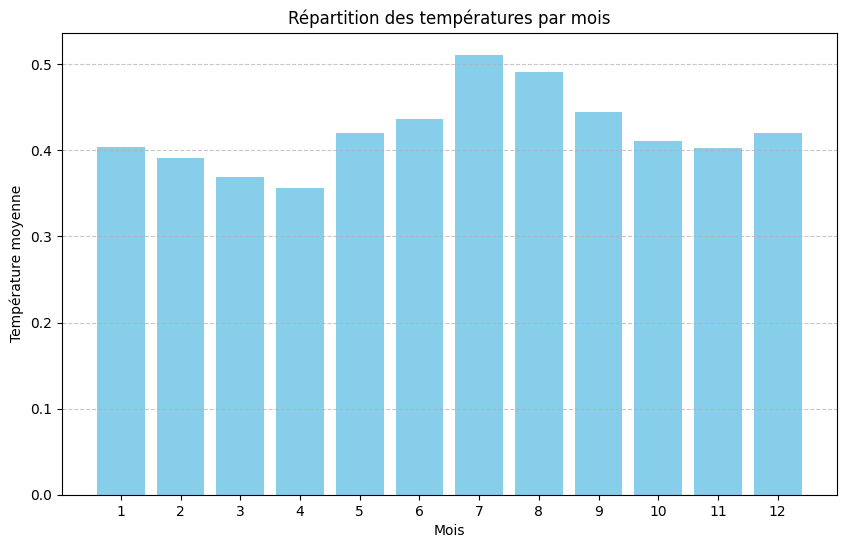

In [109]:
import matplotlib.pyplot as plt

# Extraire le mois de la date
dataset['month'] = dataset['Crash Date/Time'].dt.month

# Calculer la température moyenne par mois
temp_moyenne_par_mois = dataset.groupby('month')['wind_speed_normalized_year_abs'].mean()

# Diagramme en bâtons
plt.figure(figsize=(10,6))
plt.bar(temp_moyenne_par_mois.index, temp_moyenne_par_mois.values, color='skyblue')
plt.xticks(range(1,13))  # Mois de 1 à 12
plt.xlabel('Mois')
plt.ylabel('Température moyenne')
plt.title('Répartition des températures par mois')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# III. Descriptive Analysis <a id="descriptive"></a>

This section is devoted to descriptive statistical analyses designed to characterize the dataset and explore preliminary relationships between key variables. We begin by constructing categorical variables from selected continuous and nominal features in order to enable stratified analyses and improve interpretability. We then perform an exploratory analysis of the newly added meteorological variables, focusing on their distributions, central tendencies, and variability.

Subsequently, we investigate the association between nighttime conditions and the proportion of drivers involved in substance abuse, using summary statistics and comparative measures. We also examine the relationship between traffic accidents and standardized weather codes, followed by a spatial analysis in which accident occurrences are visualized on area maps under multiple conditions. Finally, we analyze injury severity outcomes and assess how accident frequencies vary across different meteorological conditions, providing an initial descriptive foundation for subsequent inferential modeling.

In [88]:
### Nom des database que nous allons utiliser 

# Database avec 100 000 lignes sans météo -> bigbase_final
# Database avec météo mais sample -> 

## III.1 Construction of Categorical Variables

We create new categorical variables derived from the textual variables Driver_Under_Influence and Injury Severity in order to facilitate descriptive statistical analyses and support subsequent predictive modeling. This transformation allows for clearer interpretation and more efficient use of these variables in both exploratory and inferential frameworks.

### Case of substance consumption 

In [85]:
## V1: AVEC LE SAMPLE

# variable driver_substance_abuse has 3 categories: 0 (No), 1 (Yes), 2 (Unknown)

# adding a column to the dataset indicating whether the driver was under the influence or not

under_influence_modalities = [
    "ALCOHOL PRESENT",
    "ALCOHOL CONTRIBUTED",
    "ILLEGAL DRUG PRESENT",
    "ILLEGAL DRUG CONTRIBUTED",
    "Suspect of Alcohol Use, Not Suspect of Drug Use",
    "Suspect of Alcohol Use, Unknown",
    "Suspect of Alcohol Use, Suspect of Drug Use",
    "COMBINED SUBSTANCE PRESENT",
    "MEDICATION CONTRIBUTED",
    "MEDICATION PRESENT",
]

# We apply this to the two types of datasets : 
car_accidents_data["Driver_Under_Influence"] = car_accidents_data["Driver Substance Abuse"].apply(
    lambda x: 1 if x in under_influence_modalities else 0
)


bigbase_final["Driver_Under_Influence"] = bigbase_final["Driver Substance Abuse"].apply(
    lambda x: 1 if x in under_influence_modalities else 0
)

bigbase_final["Driver_Under_Influence"].value_counts()
car_accidents_data["Driver_Under_Influence"].value_counts()




Driver_Under_Influence
0    6280
1     218
Name: count, dtype: int64

### Case of injury 

In [86]:
import numpy as np

# Mapping dictionary
injury_map = {
    'NO APPARENT INJURY': 0,
    'No Apparent Injury': 0,
    'POSSIBLE INJURY': 1,
    'Possible Injury': 1,
    'SUSPECTED MINOR INJURY': 1,
    'Suspected Minor Injury': 1,
    'SUSPECTED SERIOUS INJURY': 2,
    'Suspected Serious Injury': 2,
    'FATAL INJURY': 2,
    'Fatal Injury': 2,
    np.nan: np.nan
}

# We apply this to the two types of datasets : 
dataset['injury_severity_num'] = dataset['Injury Severity'].map(injury_map)
bigbase_final['injury_severity_num'] = bigbase_final['Injury Severity'].map(injury_map)

# Check results
print(dataset[['Injury Severity', 'injury_severity_num']].head(10))


          Injury Severity  injury_severity_num
0      NO APPARENT INJURY                  0.0
1         POSSIBLE INJURY                  1.0
2      NO APPARENT INJURY                  0.0
3         POSSIBLE INJURY                  1.0
4      NO APPARENT INJURY                  0.0
5  SUSPECTED MINOR INJURY                  1.0
6      No Apparent Injury                  0.0
7  Suspected Minor Injury                  1.0
8      No Apparent Injury                  0.0
9      NO APPARENT INJURY                  0.0


 II.1) Repartition of the modalities of variables

In [87]:
import os
import pandas as pd

if os.path.exists("completed_dataset_sample.csv"):
    car_accidents_data = pd.read_csv("completed_dataset_sample.csv") # usecols=usecols) to select specific columns
else:
    print("completed_dataset_sample.csv file not found.")


import pandas as pd
import numpy as np

# here we call the million line dataset 
big_dataset=pd.read_csv("Crash_Reporting_-_Drivers_Data.csv").copy()

C:\Users\33783\AppData\Local\Temp\ipykernel_3164\597559135.py:14: DtypeWarning: Columns (1,9) have mixed types. Specify dtype option on import or set low_memory=False.
  big_dataset=pd.read_csv("Crash_Reporting_-_Drivers_Data.csv").copy()


In [89]:
car_accidents_data.head()

print(car_accidents_data["weather_code"].value_counts())

weather_code
3.0     2116
0.0     1938
1.0      725
2.0      593
51.0     533
53.0     184
61.0     156
63.0     104
55.0      64
73.0      37
71.0      26
75.0      13
65.0       9
Name: count, dtype: int64


## III.2 Preliminary Analysis of the New Meteorological Variables

We examine the distribution of observations for each meteorological variable in the dataset using simple graphical representations.

We first implement functions to generate histograms for the variables of interest.

In [90]:
# The goal here is to get an intuition through a spacial visualation of our weather variables

import matplotlib.pyplot as plt

def plot_numeric_histogram(df, column_name, bins=30, color='skyblue'):
    """
    Displays the histogram of a numerical variable.

    Arguments:
    df : pandas.DataFrame
    column_name : str, name of the numerical column
    bins : int, number of bins for the histogram (default: 30)
    color : str, color of the histogram (default: 'skyblue')
    """
    plt.figure(figsize=(8,5))
    plt.hist(df[column_name].dropna(), bins=bins, color=color, edgecolor='black')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column_name}')
    plt.show()


### Case of Temperature

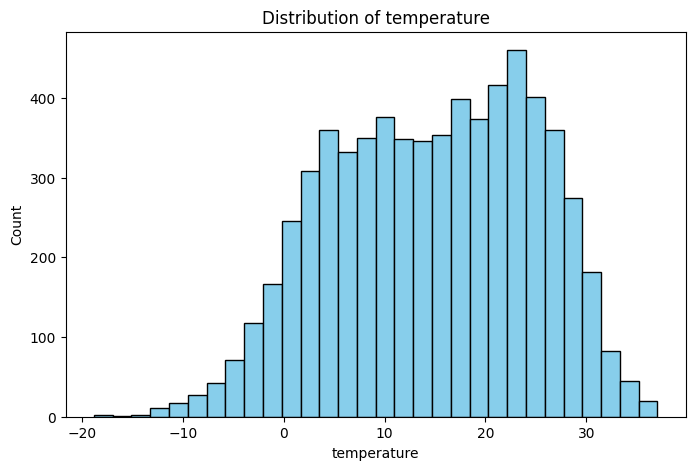

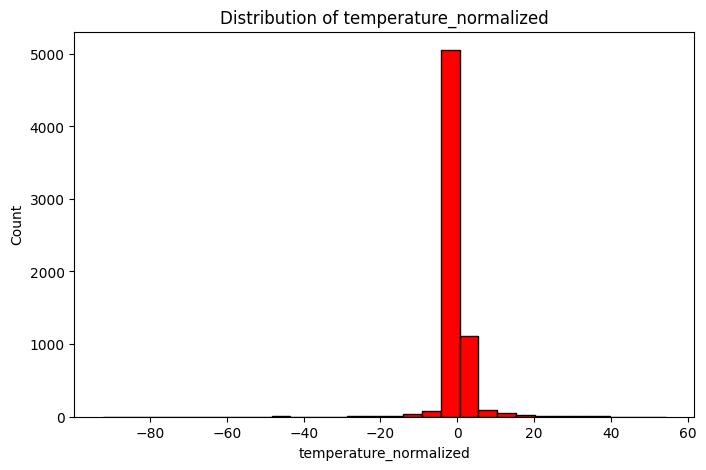

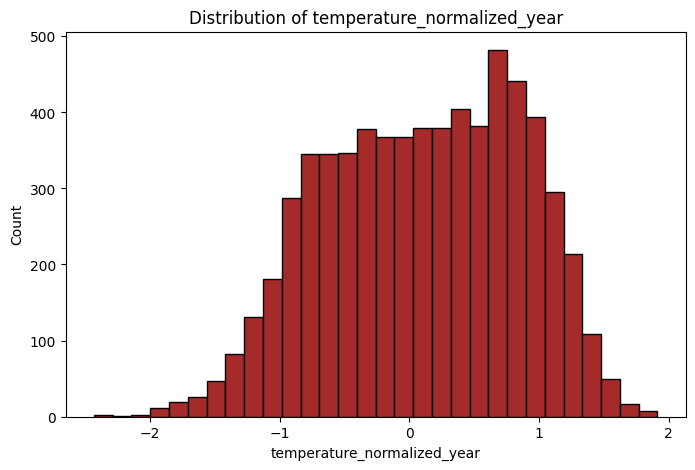

In [91]:
plot_numeric_histogram(dataset, "temperature", bins=30, color='skyblue')
plot_numeric_histogram(dataset, "temperature_normalized", bins=30, color='red')
plot_numeric_histogram(dataset, "temperature_normalized_year", bins=30, color='brown')


For the non-normalized temperature variable, we observe a wide range of values, which is expected since temperatures from all months of the year are considered. The temperature normalized at the annual level exhibits a similar pattern. In contrast, the monthly normalized temperature shows limited deviation from seasonal norms, indicating that few observations correspond to unusually extreme temperatures for a given month.

### Case of precipitation

We observe that most days correspond to low precipitation levels. The normalized version of this variable exhibits a similar distribution.

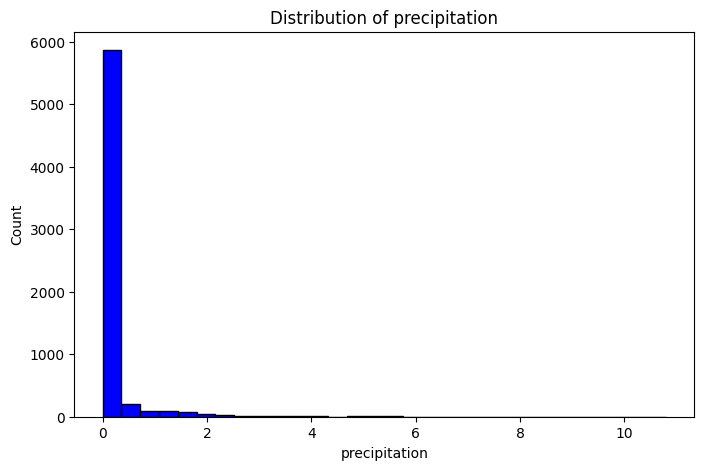

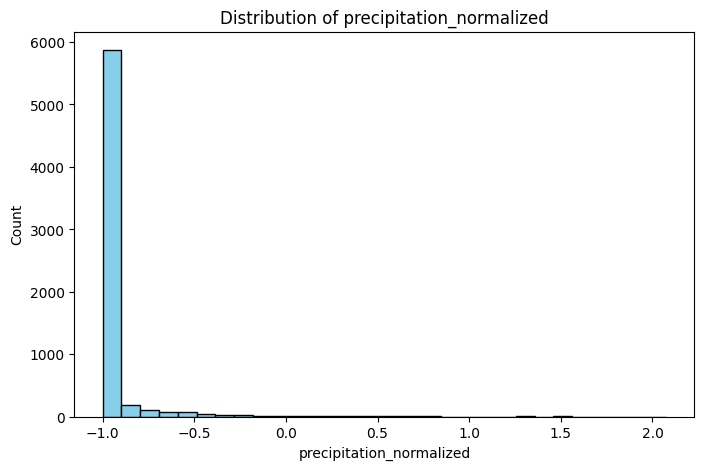

In [94]:
plot_numeric_histogram(dataset, "precipitation", bins=30, color='blue')
plot_numeric_histogram(dataset, "precipitation_normalized", bins=30, color='skyblue')

### Case of snowfall

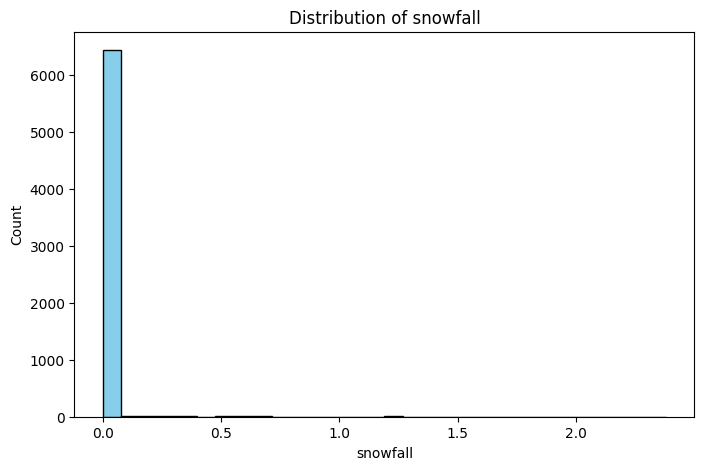

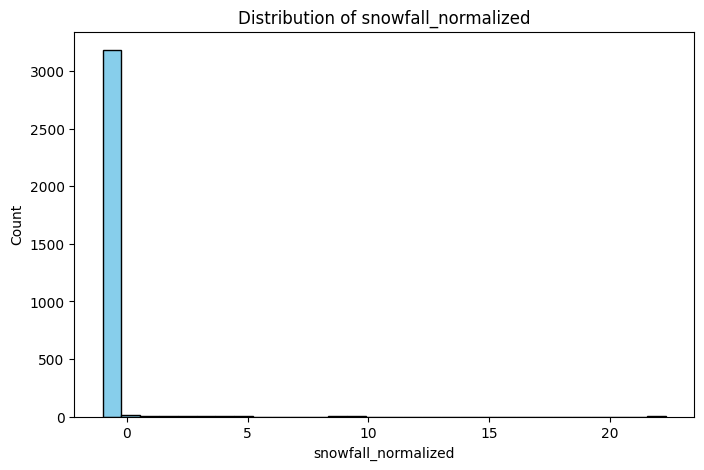

In [ ]:
plot_numeric_histogram(dataset, "snowfall", bins=30, color='skyblue')
plot_numeric_histogram(dataset, "snowfall_normalized", bins=30, color='skyblue')

We observe that snowfall is extremely rare in Montgomery County; consequently, the snowfall variable will be excluded from the analysis.

### Case of wind speed

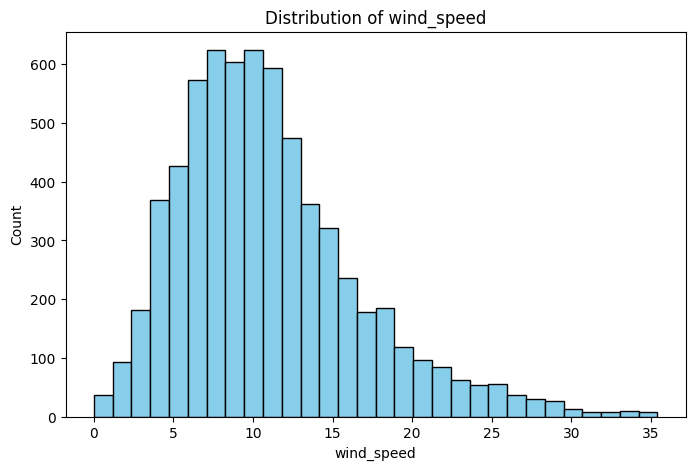

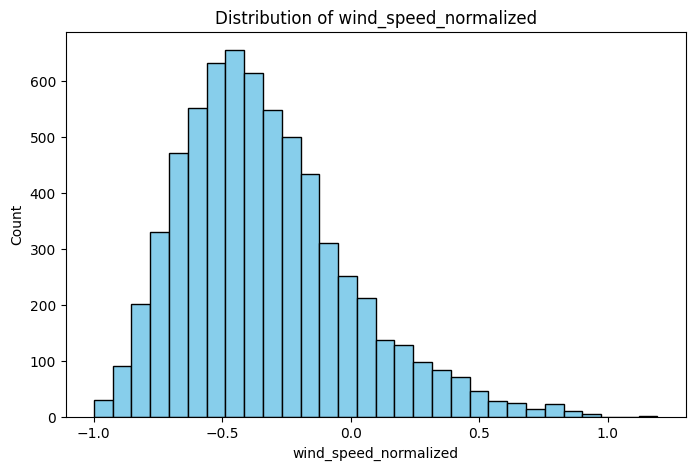

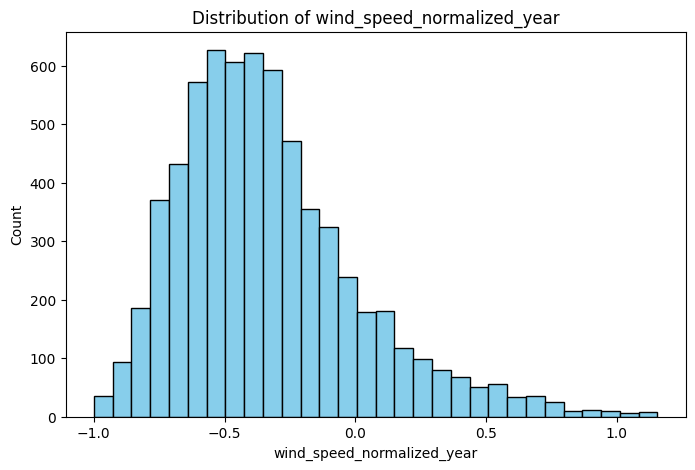

In [111]:
plot_numeric_histogram(dataset, "wind_speed", bins=30, color='skyblue')
plot_numeric_histogram(dataset, "wind_speed_normalized", bins=30, color='skyblue')
plot_numeric_histogram(dataset, "wind_speed_normalized_year", bins=30, color='skyblue')

Wind speed exhibits substantial variability across observations.

### Weather code 

{Mettre un reminder sur le fonctionnement du Weather code}

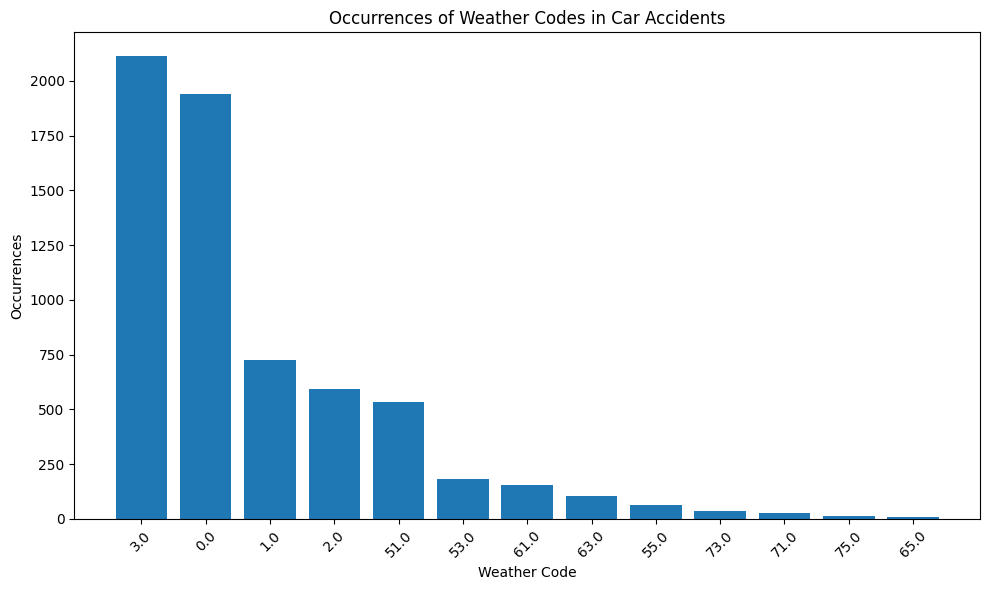

In [ ]:
# Plotting the graphs with the proportion of weather_code in Car Accidents
#labels = ["Not Under Influence", "Under Influence"]
# compter les occurrences
counts = car_accidents_data["weather_code"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(counts.index.astype(str), counts.values)  # aucun style/couleur imposé
plt.xlabel("Weather Code")
plt.ylabel("Occurrences")
plt.title("Occurrences of Weather Codes in Car Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

While we see that there is a great range of temperatures, and wind speeds, the county we chose is not very rainy nor snowy 

## III.3 Correlation between night and the percentage of accident with Driver Substance Abuse

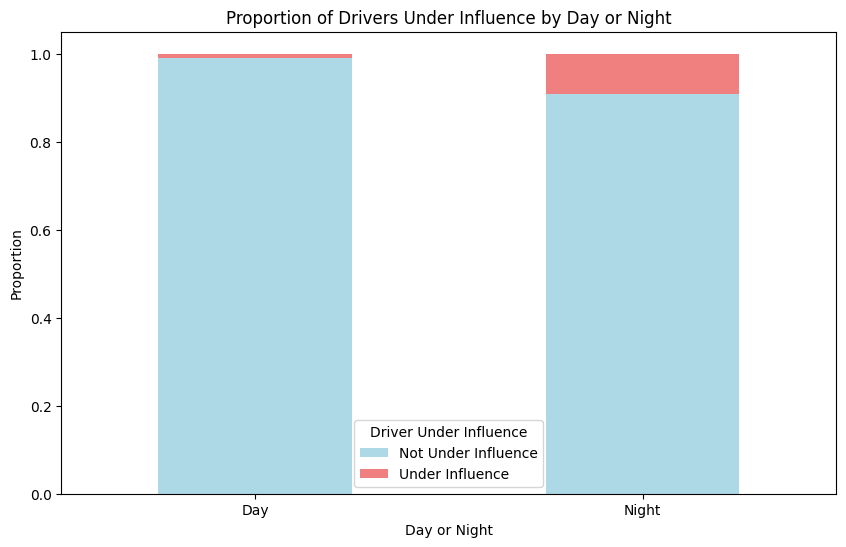

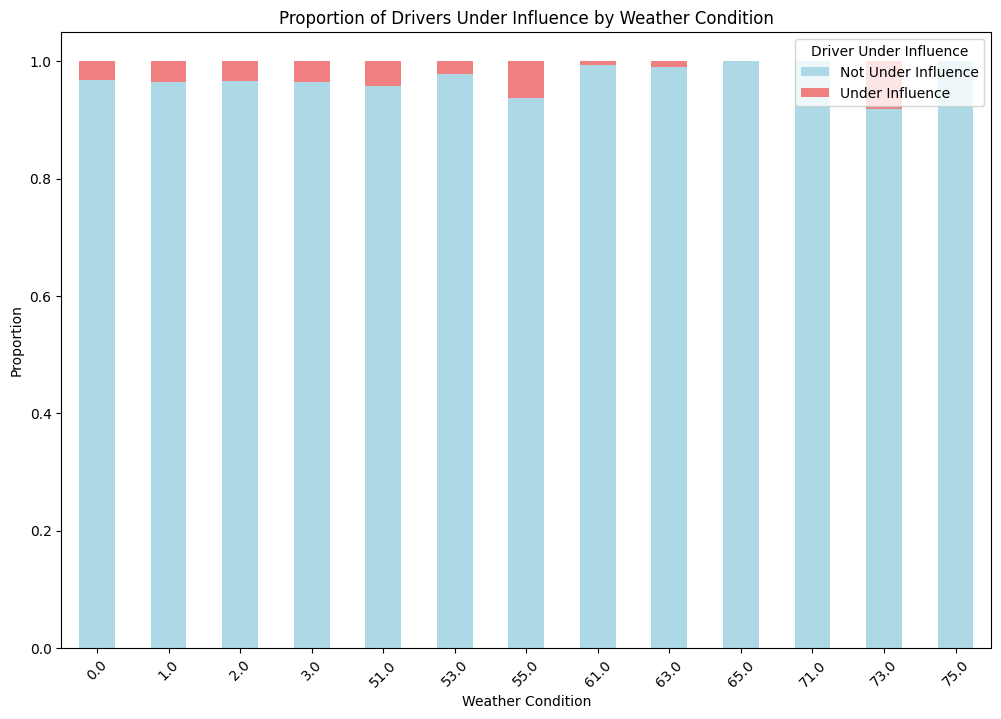

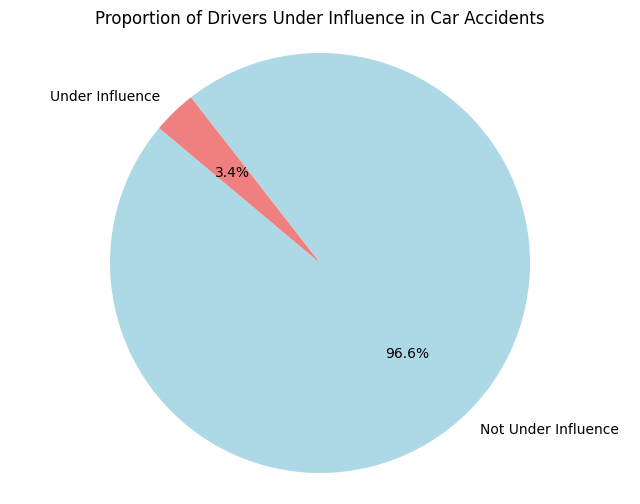

In [ ]:
## V1: AVEC LE SAMPLE


import matplotlib.pyplot as plt
# percentage of accident where the driver was under the influence during the night vs day
day_night_influence = pd.crosstab(
    car_accidents_data["day_or_night_code"],
    car_accidents_data["Driver_Under_Influence"],
    rownames=["Day or Night"],
    colnames=["Driver Under Influence"],
    normalize='index'
)

day_night_influence.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightcoral'])
plt.title("Proportion of Drivers Under Influence by Day or Night")
plt.ylabel("Proportion")
plt.xticks(ticks=[0, 1], labels=["Day", "Night"], rotation=0)
plt.legend(title="Driver Under Influence", labels=["Not Under Influence", "Under Influence"])
plt.show()


# percentage of accident where the driver was under the influence during different weather conditions
weather_influence = pd.crosstab(
    car_accidents_data["weather_code"],
    car_accidents_data["Driver_Under_Influence"],
    rownames=["Weather Condition"],
    colnames=["Driver Under Influence"],
    normalize='index'
)

weather_influence.plot(kind='bar', stacked=True, figsize=(12, 8), color=['lightblue', 'lightcoral'])
plt.title("Proportion of Drivers Under Influence by Weather Condition")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Driver Under Influence", labels=["Not Under Influence", "Under Influence"])
plt.show()

# Plotting the graphs with the proportion of drivers under influence in Car Accidents
labels = ["Not Under Influence", "Under Influence"]
sizes = car_accidents_data["Driver_Under_Influence"].value_counts().values
colors = ['lightblue', 'lightcoral']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Drivers Under Influence in Car Accidents")
plt.axis('equal')
plt.show()

In [ ]:
print(big_dataset)

       Report Number Local Case Number Agency Name       ACRS Report Type  \
0        MCP3126006X         250037402  MONTGOMERY           Injury Crash   
1        MCP2349001B         250037516  MONTGOMERY  Property Damage Crash   
2        MCP296500BC         250033157  MONTGOMERY  Property Damage Crash   
3        MCP2159003K         250037509  MONTGOMERY  Property Damage Crash   
4        MCP312900D6         250034573  MONTGOMERY  Property Damage Crash   
...              ...               ...         ...                    ...   
206304    DD5666002H         250037005   ROCKVILLE           Injury Crash   
206305   MCP3257008X         250036805  MONTGOMERY  Property Damage Crash   
206306   MCP2864005C         250036079  MONTGOMERY  Property Damage Crash   
206307   MCP33870035         250036843  MONTGOMERY           Injury Crash   
206308   MCP2987009S         250036613  MONTGOMERY  Property Damage Crash   

               Crash Date/Time              Route Type  \
0       08/21/202

### V2: Avec les 1 million de lignes

#### IMPORTANT : le code ne compile pas car il n'y a pas de day or night code dans la grosse data base 

In [ ]:
"""

## V2: Avec les 1 million de lignes

# variable driver_substance_abuse has 3 categories: 0 (No), 1 (Yes), 2 (Unknown)

# adding a column to the dataset indicating whether the driver was under the influence or not

under_influence_modalities = [
    "ALCOHOL PRESENT",
    "ALCOHOL CONTRIBUTED",
    "ILLEGAL DRUG PRESENT",
    "ILLEGAL DRUG CONTRIBUTED",
    "Suspect of Alcohol Use, Not Suspect of Drug Use",
    "Suspect of Alcohol Use, Unknown",
    "Suspect of Alcohol Use, Suspect of Drug Use",
    "COMBINED SUBSTANCE PRESENT",
    "MEDICATION CONTRIBUTED",
    "MEDICATION PRESENT",
]

big_dataset["Driver_Under_Influence"] = big_dataset["Driver Substance Abuse"].apply(
    lambda x: 1 if x in under_influence_modalities else 0
)

big_dataset["Driver_Under_Influence"].value_counts()

import matplotlib.pyplot as plt
# percentage of accident where the driver was under the influence during the night vs day
day_night_influence = pd.crosstab(
    big_dataset["day_or_night_code"],
    big_dataset["Driver_Under_Influence"],
    rownames=["Day or Night"],
    colnames=["Driver Under Influence"],
    normalize='index'
)

day_night_influence.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightcoral'])
plt.title("Proportion of Drivers Under Influence by Day or Night")
plt.ylabel("Proportion")
plt.xticks(ticks=[0, 1], labels=["Day", "Night"], rotation=0)
plt.legend(title="Driver Under Influence", labels=["Not Under Influence", "Under Influence"])
plt.show()


# percentage of accident where the driver was under the influence during different weather conditions
weather_influence = pd.crosstab(
    big_dataset["weather_code"],
    big_dataset["Driver_Under_Influence"],
    rownames=["Weather Condition"],
    colnames=["Driver Under Influence"],
    normalize='index'
)

weather_influence.plot(kind='bar', stacked=True, figsize=(12, 8), color=['lightblue', 'lightcoral'])
plt.title("Proportion of Drivers Under Influence by Weather Condition")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Driver Under Influence", labels=["Not Under Influence", "Under Influence"])
plt.show()

# Plotting the graphs with the proportion of drivers under influence in Car Accidents
labels = ["Not Under Influence", "Under Influence"]
sizes = big_dataset["Driver_Under_Influence"].value_counts().values
colors = ['lightblue', 'lightcoral']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Drivers Under Influence in Car Accidents")
plt.axis('equal')
plt.show()

"""

'\n\n## V2: Avec les 1 million de lignes\n\n# variable driver_substance_abuse has 3 categories: 0 (No), 1 (Yes), 2 (Unknown)\n\n# adding a column to the dataset indicating whether the driver was under the influence or not\n\nunder_influence_modalities = [\n    "ALCOHOL PRESENT",\n    "ALCOHOL CONTRIBUTED",\n    "ILLEGAL DRUG PRESENT",\n    "ILLEGAL DRUG CONTRIBUTED",\n    "Suspect of Alcohol Use, Not Suspect of Drug Use",\n    "Suspect of Alcohol Use, Unknown",\n    "Suspect of Alcohol Use, Suspect of Drug Use",\n    "COMBINED SUBSTANCE PRESENT",\n    "MEDICATION CONTRIBUTED",\n    "MEDICATION PRESENT",\n]\n\nbig_dataset["Driver_Under_Influence"] = big_dataset["Driver Substance Abuse"].apply(\n    lambda x: 1 if x in under_influence_modalities else 0\n)\n\nbig_dataset["Driver_Under_Influence"].value_counts()\n\nimport matplotlib.pyplot as plt\n# percentage of accident where the driver was under the influence during the night vs day\nday_night_influence = pd.crosstab(\n    big_dataset["

## III.4 Plotting area map with multiple conditions 

In [ ]:
print(car_accidents_data)

      Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  \
0                0             0             0             0             0   
1                1             1             1             1             1   
2                2             2             2             2             2   
3                3             3             3             3             3   
4                4             4             4             4             4   
...            ...           ...           ...           ...           ...   
6493          6493          6493          6493          6493          6493   
6494          6494          6494          6494          6494          6494   
6495          6495          6495          6495          6495          6495   
6496          6496          6496          6496          6496          6496   
6497          6497          6497          6497          6497          6497   

      Unnamed: 0 Report Number Local Case Number               

In [ ]:
# Extraire la date
car_accidents_data['Date'] = car_accidents_data['Crash Date/Time'].str.split(" ").str[0]

# Convertir l'heure en format 24h
def convert_to_24h(date_time):
    hour = date_time.split(" ")[1].split(":")[0]
    time_of_day = date_time.split(" ")[2]
    time_minutes = date_time.split(" ")[1].split(":")[1]

    if time_of_day == "PM" and hour != "12":
        accident_hour_24h = int(hour) + 12
    elif time_of_day == "AM" and hour == "12":
        accident_hour_24h = 00
    else :
        accident_hour_24h = int(hour)

    if accident_hour_24h < 10:
        accident_hour_24h = "0" + str(accident_hour_24h)

    accident_time_24h = str(accident_hour_24h) + ":" + time_minutes + ":00"

    return accident_time_24h

car_accidents_data['Accident time in 24h format'] = car_accidents_data['Crash Date/Time'].apply(convert_to_24h)

car_accidents_data[['Crash Date/Time', 'Date', 'Accident time in 24h format', 'Latitude', 'Longitude']].head()

Crash Date/Time        Date Accident time in 24h format   Latitude  \
0  04/12/2022 07:40:00 AM  04/12/2022                    07:40:00  39.084912   
1  06/23/2016 10:35:00 AM  06/23/2016                    10:35:00  39.013298   
2  03/09/2016 07:00:00 AM  03/09/2016                    07:00:00  39.026372   
3  05/14/2018 06:55:00 AM  05/14/2018                    06:55:00  39.176243   
4  05/06/2020 03:02:00 PM  05/06/2020                    15:02:00  38.992689   

   Longitude  
0 -77.076068  
1 -77.045822  
2 -77.204397  
3 -77.118350  
4 -77.161965

In [ ]:
## V2: Avec les 1M de lignes

# Extraire la date
bigbase_final['Date'] = bigbase_final['Crash Date/Time'].str.split(" ").str[0]

# Convertir l'heure en format 24h
def convert_to_24h(date_time):
    hour = date_time.split(" ")[1].split(":")[0]
    time_of_day = date_time.split(" ")[2]
    time_minutes = date_time.split(" ")[1].split(":")[1]

    if time_of_day == "PM" and hour != "12":
        accident_hour_24h = int(hour) + 12
    elif time_of_day == "AM" and hour == "12":
        accident_hour_24h = 00
    else :
        accident_hour_24h = int(hour)

    if accident_hour_24h < 10:
        accident_hour_24h = "0" + str(accident_hour_24h)

    accident_time_24h = str(accident_hour_24h) + ":" + time_minutes + ":00"

    return accident_time_24h

bigbase_final['Accident time in 24h format'] = bigbase_final['Crash Date/Time'].apply(convert_to_24h)

bigbase_final[['Crash Date/Time', 'Date', 'Accident time in 24h format', 'Latitude', 'Longitude']].head()

Crash Date/Time        Date Accident time in 24h format   Latitude  \
0  08/21/2025 05:21:00 PM  08/21/2025                    17:21:00  39.219796   
2  07/25/2025 11:55:00 AM  07/25/2025                    11:55:00  39.121219   
3  08/22/2025 10:36:00 AM  08/22/2025                    10:36:00  39.207931   
5  08/19/2025 09:50:00 AM  08/19/2025                    09:50:00  39.092734   
6  08/23/2025 11:50:00 AM  08/23/2025                    11:50:00  39.058466   

   Longitude  
0 -77.257416  
2 -76.988905  
3 -77.141480  
5 -77.076470  
6 -77.121265

In [ ]:
import folium

# Centre approximatif de la zone (Maryland / Washington DC selon ton extrait)
center_lat = car_accidents_data["Latitude"].mean()
center_lon = car_accidents_data["Longitude"].mean()

# Création de la carte
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

# Ajout des points
for _, row in car_accidents_data.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=3,
        fill=True,
        fill_opacity=0.7,
        opacity=0.7,
        color='red' #if row["Driver_Under_Influence"] == 1 else 'blue',
    ).add_to(m)

# Affichage de la carte
m

#enregistrer la carte sous format html
m.save("car_accidents_map.html")


In [ ]:
# Extraire la date
car_accidents_data['Date'] = car_accidents_data['Crash Date/Time'].str.split(" ").str[0]

# Convertir l'heure en format 24h
def convert_to_24h(date_time):
    hour = date_time.split(" ")[1].split(":")[0]
    time_of_day = date_time.split(" ")[2]
    time_minutes = date_time.split(" ")[1].split(":")[1]

    if time_of_day == "PM" and hour != "12":
        accident_hour_24h = int(hour) + 12
    elif time_of_day == "AM" and hour == "12":
        accident_hour_24h = 00
    else :
        accident_hour_24h = int(hour)

    if accident_hour_24h < 10:
        accident_hour_24h = "0" + str(accident_hour_24h)

    accident_time_24h = str(accident_hour_24h) + ":" + time_minutes + ":00"

    return accident_time_24h

car_accidents_data['Accident time in 24h format'] = car_accidents_data['Crash Date/Time'].apply(convert_to_24h)

car_accidents_data[['Crash Date/Time', 'Date', 'Accident time in 24h format', 'Latitude', 'Longitude']].head()

Crash Date/Time        Date Accident time in 24h format   Latitude  \
0  04/12/2022 07:40:00 AM  04/12/2022                    07:40:00  39.084912   
1  06/23/2016 10:35:00 AM  06/23/2016                    10:35:00  39.013298   
2  03/09/2016 07:00:00 AM  03/09/2016                    07:00:00  39.026372   
3  05/14/2018 06:55:00 AM  05/14/2018                    06:55:00  39.176243   
4  05/06/2020 03:02:00 PM  05/06/2020                    15:02:00  38.992689   

   Longitude  
0 -77.076068  
1 -77.045822  
2 -77.204397  
3 -77.118350  
4 -77.161965

### Day VS Night

In [ ]:
import folium

# Centre approximatif
center_lat = car_accidents_data["Latitude"].mean()
center_lon = car_accidents_data["Longitude"].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

for _, row in car_accidents_data.iterrows():
    
    color = 'yellow' if row["day_or_night_code"] == 0 else 'purple'
    label = "Day" if row["day_or_night_code"] == 0 else "Night"
    
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=4,
        fill=True,
        fill_opacity=0.7,
        opacity=0.7,
        color=color,
        tooltip=f"{label}"
    ).add_to(m)

m

m.save("car_accidents_map_day_vs_night.html")

### Weather code

In [ ]:
import folium

weather_mapping = {
    0.0: ("skyblue", "Clear"),
    1.0: ("blue", "Rain"),
    2.0: ("white", "Snow"),
    3.0: ("gray", "Fog"),
    51.0: ("lightblue", "Drizzle"),
    53.0: ("deepskyblue", "Rain Shower"),
    55.0: ("darkblue", "Heavy Rain"),
    61.0: ("lightgray", "Sleet"),
    63.0: ("silver", "Freezing Rain"),
    65.0: ("darkgray", "Hail"),
    71.0: ("snow", "Snowfall Light"),
    73.0: ("whitesmoke", "Snowfall Moderate"),
    75.0: ("aliceblue", "Snowfall Heavy"),
}

# Centre de la carte
center_lat = car_accidents_data["Latitude"].mean()
center_lon = car_accidents_data["Longitude"].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

# Ajout des points avec couleur selon weather_code
for _, row in car_accidents_data.iterrows():
    color, label = weather_mapping.get(row["weather_code"], ("black", "Unknown"))
    
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=4,
        fill=True,
        fill_opacity=0.7,
        opacity=0.7,
        color=color,
        tooltip=f"Weather: {label}"
    ).add_to(m)

m

#enregistrer la carte sous format html
m.save("car_accidents_map_by_weather.html")


### Animated version, of 10s

In [ ]:
import folium
from folium.plugins import TimestampedGeoJson
import pandas as pd

# Reconstruction robuste du datetime
car_accidents_data["datetime"] = pd.to_datetime(
    car_accidents_data["Date"] + " " + car_accidents_data["Accident time in 24h format"],
    errors="coerce"
)

df = car_accidents_data.dropna(subset=["datetime"]).sort_values("datetime")

# Centre de la carte
center_lat = df["Latitude"].mean()
center_lon = df["Longitude"].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

# Construction du GeoJSON animé (format "times": [...])
features = []
for _, row in df.iterrows():
    iso_time = row["datetime"].strftime("%Y-%m-%dT%H:%M:%S")
    
    features.append({
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [row["Longitude"], row["Latitude"]],
        },
        "properties": {
            "times": [iso_time],
            "popup": f"{iso_time}",
            "icon": "circle",
            "iconstyle": {
                "radius": 4,
                "color": "red",
                "fillColor": "red",
                "fillOpacity": 0.7
            }
        }
    })

TimestampedGeoJson(
    {"type": "FeatureCollection", "features": features},
    period="PT1S",
    duration="PT10S",
    auto_play=True,
    loop=False,
    add_last_point=True
).add_to(m)

m


### Drafts

In [ ]:
import pandas as pd
import plotly.express as px

car_accidents_data["Datetime"] = pd.to_datetime(
    car_accidents_data["Date"] + " " + car_accidents_data["Accident time in 24h format"]
)
car_accidents_data = car_accidents_data.sort_values("Datetime")
car_accidents_data["DatetimeStr"] = car_accidents_data["Datetime"].dt.strftime("%Y-%m-%d %H:%M:%S")

# Pour réduire le nombre de frames, on peut arrondir à la minute
car_accidents_data["Minute"] = car_accidents_data["Datetime"].dt.floor('T').astype(str)

fig = px.scatter_mapbox(
    car_accidents_data,
    lat="Latitude",
    lon="Longitude",
    hover_name="DatetimeStr",
    animation_frame="Minute",
    zoom=9,
    height=700,
)

fig.update_layout(
    mapbox_style="open-street-map",
    title="Accidents de voiture dans le temps",
    title_x=0.5
)

# Vitesse de l'animation
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 100  # 100 ms par frame
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 0

fig.show()

C:\Users\33783\AppData\Local\Temp\ipykernel_4652\4241008579.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  car_accidents_data["Minute"] = car_accidents_data["Datetime"].dt.floor('T').astype(str)
C:\Users\33783\AppData\Local\Temp\ipykernel_4652\4241008579.py:13: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# we are gonna create an animation in fonction of the time, showing car accidents occuring over time (one car accident remains on the map for 1 second before disappearing)

import time
start_time = time.perf_counter()
n = len(car_accidents_data)

for i in range(0,n):
    print(f"Processing row {i} of {n}")
    latitude = car_accidents_data.iloc[i]['Latitude']
    longitude = car_accidents_data.iloc[i]['Longitude']
    date_time = car_accidents_data.iloc[i]['Crash Date/Time']

    date = date_time.split(" ")[0]
    accident_time = date_time.split(" ")[1] #useless

    hour = date_time.split(" ")[1].split(":")[0]
    time_of_day = date_time.split(" ")[2]
    time_minutes = date_time.split(" ")[1].split(":")[1]

    if time_of_day == "PM" and hour != "12":
        accident_hour_24h = int(hour) + 12
    elif time_of_day == "AM" and hour == "12":
        accident_hour_24h = 00
    else :
        accident_hour_24h = int(hour)

    if accident_hour_24h < 10:
        accident_hour_24h = "0" + str(accident_hour_24h)
    accident_time_24h = str(accident_hour_24h) + ":" + time_minutes + ":00"
    
    car_accidents_data[i, "Date" ] = date
    car_accidents_data[i, "Accident time in 24h format"] = accident_time_24h


    """
    print("Latitude: ", latitude)
    print("Longitude: ", longitude)
    print("Date: ", date)
    print("Accident time in 24h format: ", accident_time_24h)
    """

Processing row 0 of 6498
Processing row 1 of 6498
Processing row 2 of 6498
Processing row 3 of 6498
Processing row 4 of 6498
Processing row 5 of 6498
Processing row 6 of 6498
Processing row 7 of 6498
Processing row 8 of 6498
Processing row 9 of 6498
Processing row 10 of 6498
Processing row 11 of 6498
Processing row 12 of 6498
Processing row 13 of 6498
Processing row 14 of 6498
Processing row 15 of 6498
Processing row 16 of 6498
Processing row 17 of 6498
Processing row 18 of 6498
Processing row 19 of 6498
Processing row 20 of 6498
Processing row 21 of 6498
Processing row 22 of 6498
Processing row 23 of 6498
Processing row 24 of 6498
Processing row 25 of 6498
Processing row 26 of 6498
Processing row 27 of 6498
Processing row 28 of 6498
Processing row 29 of 6498
Processing row 30 of 6498
Processing row 31 of 6498
Processing row 32 of 6498
Processing row 33 of 6498
Processing row 34 of 6498
Processing row 35 of 6498
Processing row 36 of 6498
Processing row 37 of 6498
Processing row 38 of 6

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

# Patch pour NumPy 2.0 afin d'éviter l'erreur "np.bool8"
if not hasattr(np, "bool8"):
    np.bool8 = np.bool_

# ----------------------------
# 1) Construction du datetime
# ----------------------------
car_accidents_data["Datetime"] = car_accidents_data.apply(
    lambda row: pd.to_datetime(row["Date"] + " " + row["Accident time in 24h format"]),
    axis=1
)

# Tri des accidents par date/heure
car_accidents_data = car_accidents_data.sort_values("Datetime")

# Ajouter une colonne textuelle pour l'animation
car_accidents_data["DatetimeStr"] = car_accidents_data["Datetime"].dt.strftime("%Y-%m-%d %H:%M:%S")

# ----------------------------
# 2) Graphique animé sur carte
# ----------------------------
fig = px.scatter_mapbox(
    car_accidents_data,
    lat="Latitude",
    lon="Longitude",
    hover_name="DatetimeStr",
    hover_data={"Latitude": True, "Longitude": True},
    animation_frame="DatetimeStr",
    zoom=9,
    height=700,
)

# Style de carte (OpenStreetMap = gratuit)
fig.update_layout(
    mapbox_style="open-street-map",
    title="Animation des accidents de voiture dans le temps",
    title_x=0.5
)

# Taille et vitesse de l'animation
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 200  # 200ms
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 0

fig.show()


KeyError: 'Date'

First let's aquire the dataset, cleaned 

In [ ]:
import pandas as pd
import numpy as np

# here we call the million line dataset 
#big_dataset=pd.read_csv("Crash_Reporting_-_Drivers_Data.csv").copy()

# dataset here is the sampled data set with weather data
#dataset=pd.read_csv("completed_dataset_sample.csv").copy()

dataset.columns



Index(['Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4',
       'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
       'Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault',
       'Injury Severity', 'Circumstance', 'Driver Distracted By',
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make',
       'Vehicle Model', 'Latitude', 'Longitude', 'Location', 'temperature',
       'apparent_temperature',

## III.5 Descriptive Analysis of Injury Severity 

### Using Scatter Plots

Scatter plots visualization is particularly useful for exploring the distribution of accident severity across geographic coordinates or meteorological conditions. By plotting individual observations, we can detect areas with higher concentrations of severe accidents or unusual occurrences. The expected outcome is to gain an intuitive understanding of where and under which conditions the most serious accidents tend to occur, providing a visual foundation for more formal statistical modeling.

In [95]:

def plot_scatter(df, x_col, y_col, color='blue', size=30, alpha=0.7):
    """
    Plot a scatter plot between two variables.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataset
    x_col : str
        Name of the column for x-axis
    y_col : str
        Name of the column for y-axis
    color : str
        Color of the points (default 'blue')
    size : int
        Size of the points (default 30)
    alpha : float
        Transparency of the points (default 0.7)
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_col], df[y_col], c=color, s=size, alpha=alpha, edgecolor='k')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatter Plot of {y_col} vs {x_col}')
    plt.grid(True)
    plt.show()


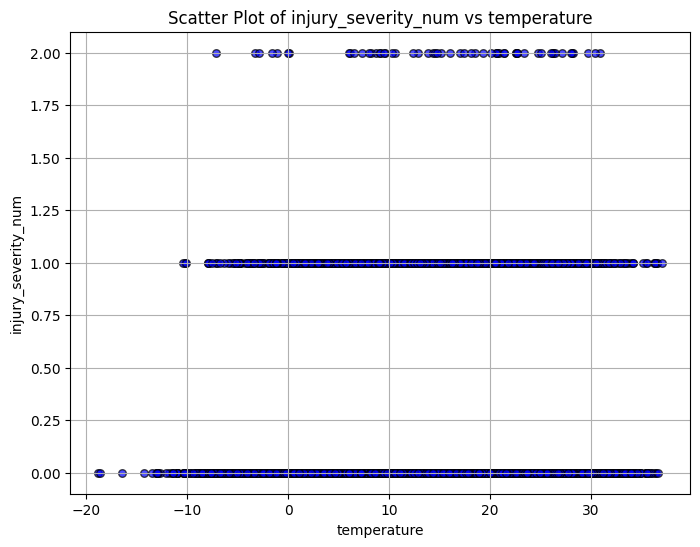

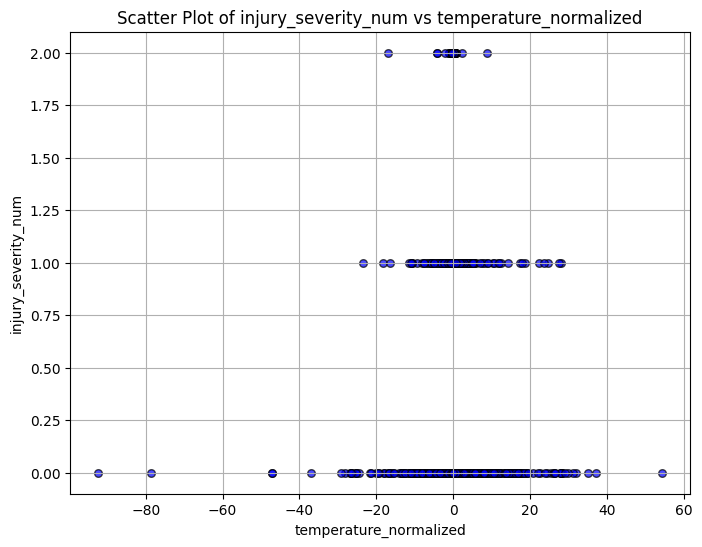

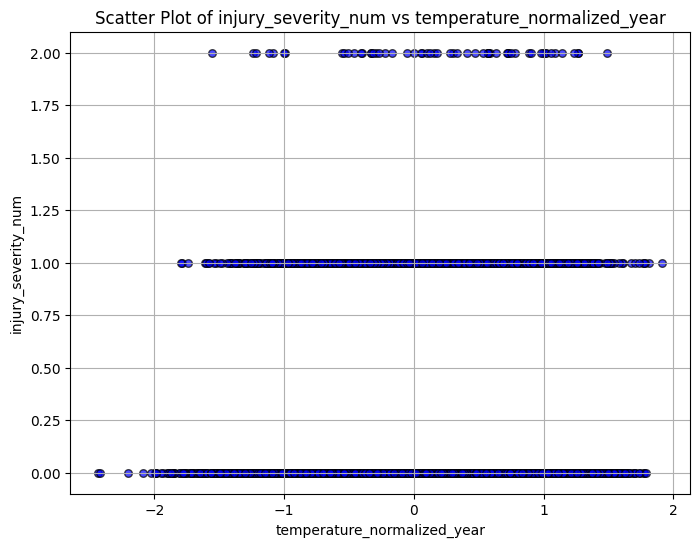

In [96]:

plot_scatter(dataset, 'temperature', 'injury_severity_num')
plot_scatter(dataset, 'temperature_normalized', 'injury_severity_num')
plot_scatter(dataset, 'temperature_normalized_year', 'injury_severity_num')


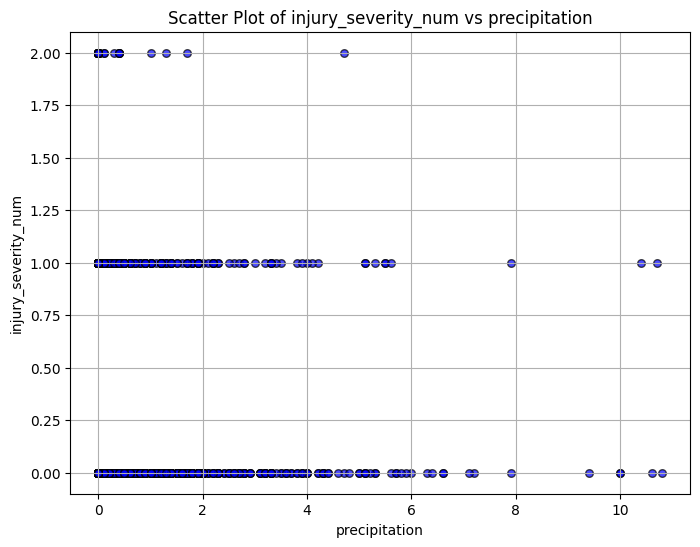

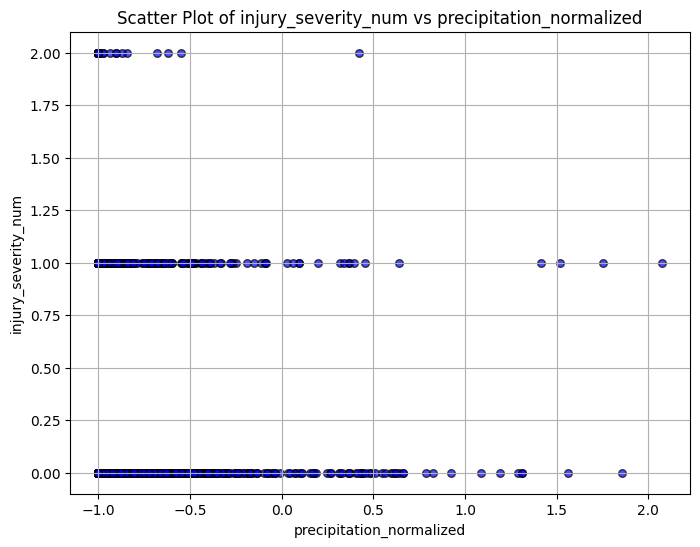

In [97]:

plot_scatter(dataset, 'precipitation', 'injury_severity_num')
plot_scatter(dataset, 'precipitation_normalized', 'injury_severity_num')


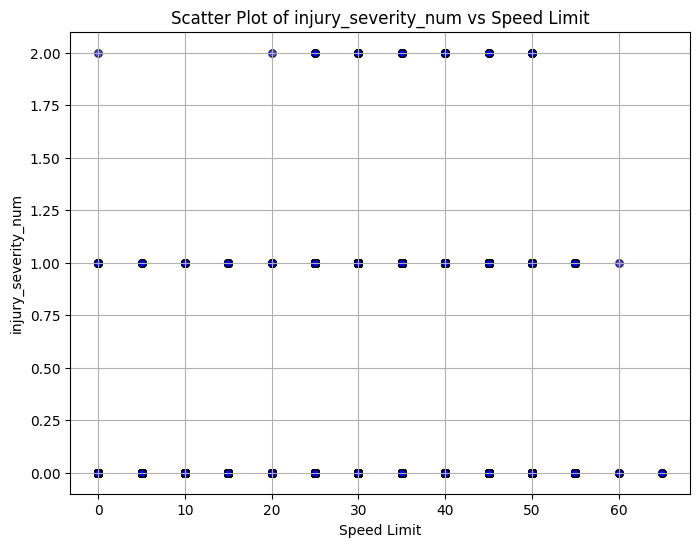

In [ ]:

plot_scatter(dataset, 'Speed Limit', 'injury_severity_num')


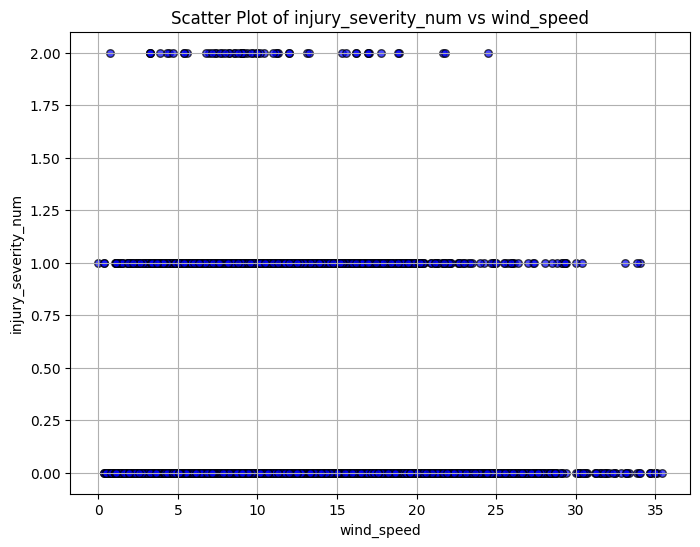

In [ ]:
plot_scatter(dataset, 'wind_speed', 'injury_severity_num')


### Analysis Using Grouped Bar Plots

Using grouped bar plots allows us to compare categorical variables across different groups simultaneously. By presenting the counts or proportions side by side, we can quickly identify patterns, disparities, or trends across categories. We expect this method to highlight which conditions are associated with higher frequencies of severe accidents providing a clear visual foundation for subsequent statistical analyses.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def grouped_barplot_proportion(df, numeric_col, category_col, bins=None, bin_labels=None, color_palette=None):
    """
    Plot a stacked bar chart showing proportions of a categorical variable for each numeric bin.

    Parameters
    ----------
    df : pandas.DataFrame
        Dataset
    numeric_col : str
        Numeric variable to bin (e.g., 'Speed Limit')
    category_col : str
        Categorical variable (e.g., 'injury_severity_ord')
    bins : list or int, optional
        Bins for numeric variable (default: no binning)
    bin_labels : list, optional
        Labels for bins (default: generated automatically)
    color_palette : list, optional
        Colors for each category (default matplotlib)
    """
    # Bin numeric variable if bins are provided
    if bins is not None:
        df['numeric_bin'] = pd.cut(df[numeric_col], bins=bins, labels=bin_labels, include_lowest=True)
    else:
        df['numeric_bin'] = df[numeric_col]

    # Pivot table: counts
    pivot = df.pivot_table(index='numeric_bin', columns=category_col, aggfunc='size', fill_value=0)

    # Convert counts to proportions per row
    pivot_prop = pivot.div(pivot.sum(axis=1), axis=0)

    # Plot stacked bar chart
    pivot_prop.plot(kind='bar', stacked=True, figsize=(12,6), width=0.8, color=color_palette, edgecolor='black')
    plt.xlabel(numeric_col)
    plt.ylabel('Proportion')
    plt.title(f'Stacked proportion of {category_col} for each {numeric_col}')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title=category_col)
    plt.show()


#### Case of speed limit (using the sampled dataset)

C:\Users\33783\AppData\Local\Temp\ipykernel_624\2735330859.py:30: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='numeric_bin', columns=category_col, aggfunc='size', fill_value=0)


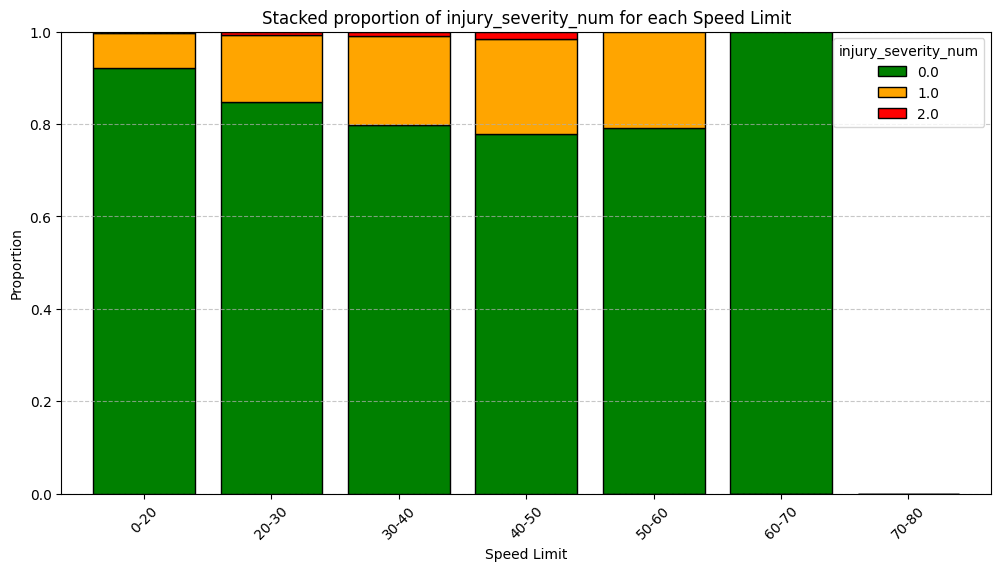

In [ ]:
speed_bins = [0, 20, 30, 40, 50, 60, 70, 80]
speed_labels = ['0-20','20-30','30-40','40-50','50-60','60-70','70-80']

grouped_barplot_proportion(
    dataset,
    numeric_col='Speed Limit',
    category_col='injury_severity_num',
    bins=speed_bins,
    bin_labels=speed_labels,
    color_palette=['green','orange','red']
)


We observe that for the Speed Limit variable, severe accidents are concentrated on roads with speed limits of 40 to 50 mph (approximately 64 to 80 km/h). In contrast, roads with lower speed limits experience fewer severe accidents, consistent with the physical relationship between speed and collision severity. Finally, roads with higher speed limits correspond to highways, which are typically engineered with safety features designed to reduce the risk of accidents.

#### Case of speed limit (using the total dataset)

C:\Users\33783\AppData\Local\Temp\ipykernel_624\2735330859.py:30: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='numeric_bin', columns=category_col, aggfunc='size', fill_value=0)


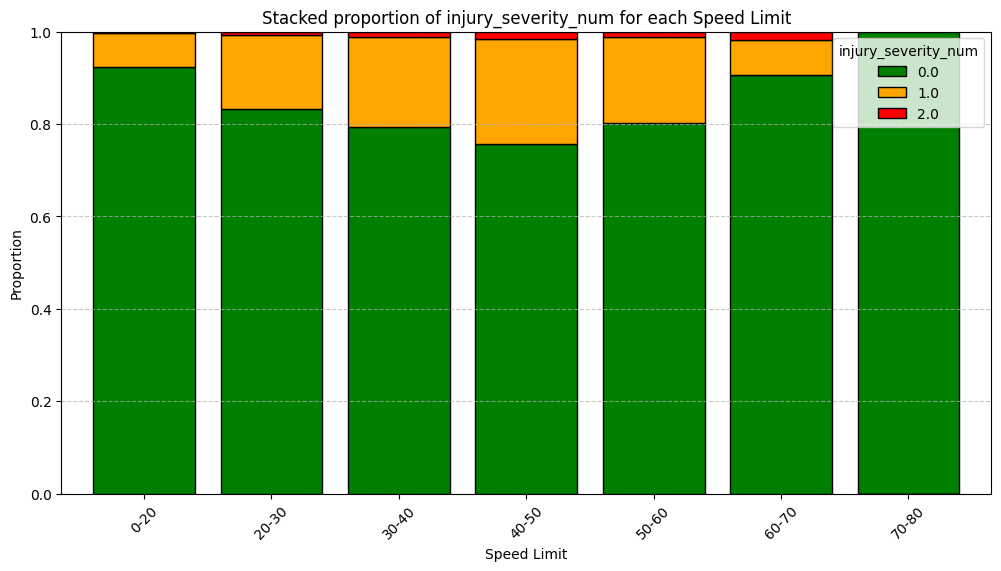

In [ ]:
speed_bins = [0, 20, 30, 40, 50, 60, 70, 80]
speed_labels = ['0-20','20-30','30-40','40-50','50-60','60-70','70-80']

grouped_barplot_proportion(
    bigbase_final,
    numeric_col='Speed Limit',
    category_col='injury_severity_num',
    bins=speed_bins,
    bin_labels=speed_labels,
    color_palette=['green','orange','red']
)

For the full (non-sampled) dataset, the same trend is observed, although there is a slightly higher number of severe accidents on roads with higher speed limits.

#### Case of temperature

C:\Users\33783\AppData\Local\Temp\ipykernel_624\2735330859.py:30: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='numeric_bin', columns=category_col, aggfunc='size', fill_value=0)


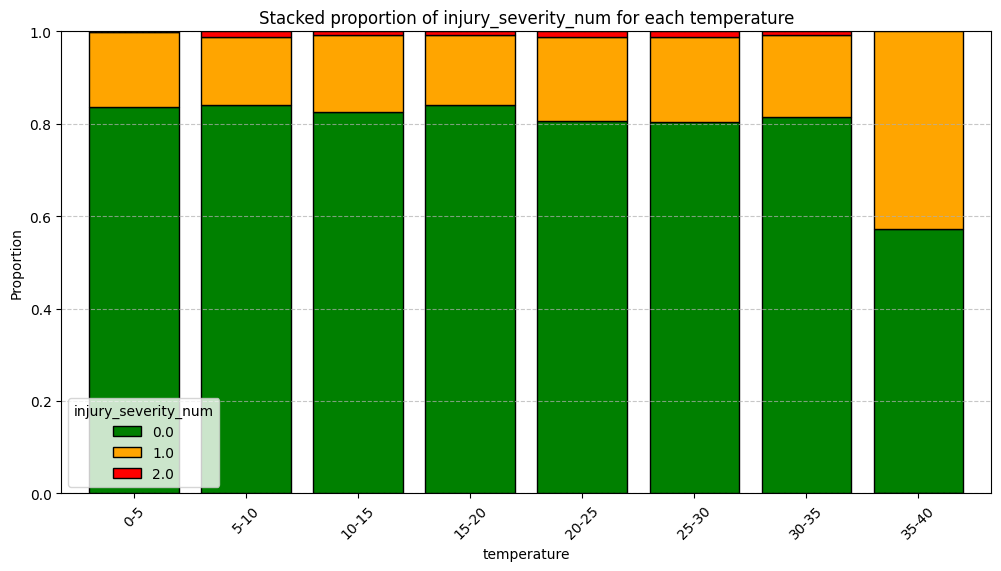

In [ ]:
# Définir des bins pour la température (ajuste selon tes données)
temp_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]  # °C
temp_labels = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40']

grouped_barplot_proportion(
    dataset,
    numeric_col='temperature',
    category_col='injury_severity_num',  # ou 'injury_severity_ord'
    bins=temp_bins,
    bin_labels=temp_labels,
    color_palette=['green','orange','red','purple','brown']  # une couleur par niveau
)


We observe that temperature appears to influence accident severity primarily at very high temperatures, exceeding 35 °C.

## III.6 Weather and number of car crashes par day 

In [ ]:
import pandas as pd

dataset['Crash Date/Time'] = pd.to_datetime(dataset['Crash Date/Time'], errors='coerce')

dataset['Crash Date'] = dataset['Crash Date/Time'].dt.date

dataset['Accidents_per_day'] = dataset.groupby('Crash Date')['Crash Date'].transform('count')

dataset[['Crash Date', 'Accidents_per_day']].head(10)


Crash Date  Accidents_per_day
0  2022-04-12                  2
1  2016-06-23                  1
2  2016-03-09                  2
3  2018-05-14                  3
4  2020-05-06                  1
5  2023-03-16                  4
6  2025-05-06                  5
7  2024-01-30                  2
8  2024-04-05                  4
9  2017-04-11                  2

In [ ]:
dataset['Accidents_per_day'].value_counts()


Accidents_per_day
2     1846
3     1554
1     1272
4      972
5      475
6      204
7      112
8       32
11      22
Name: count, dtype: int64

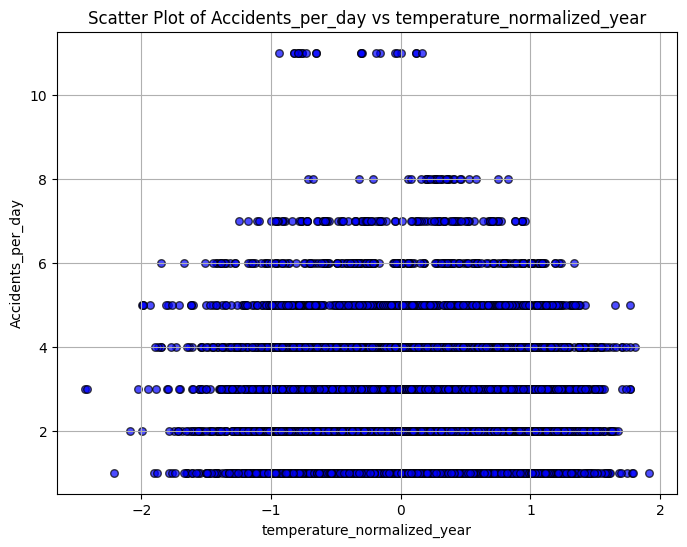

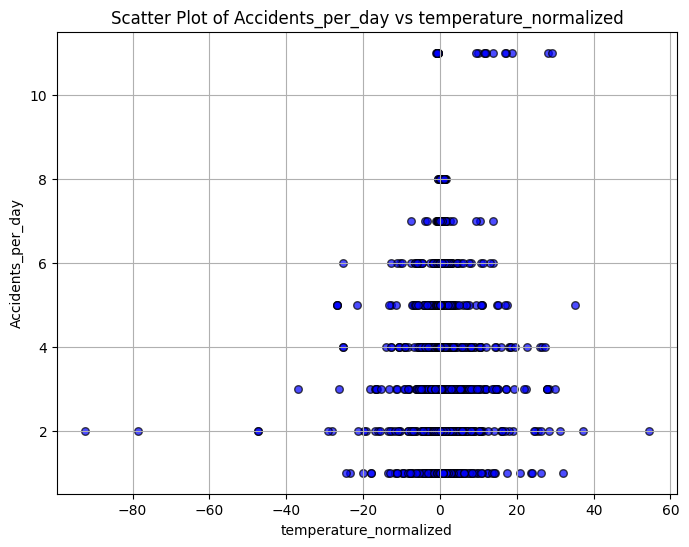

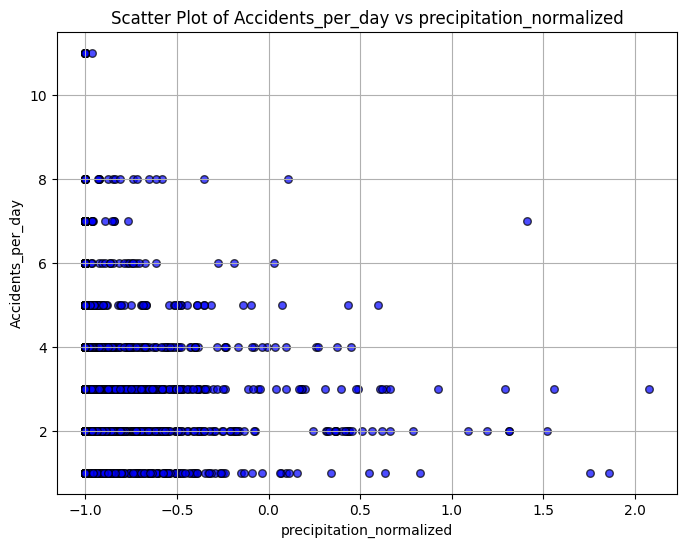

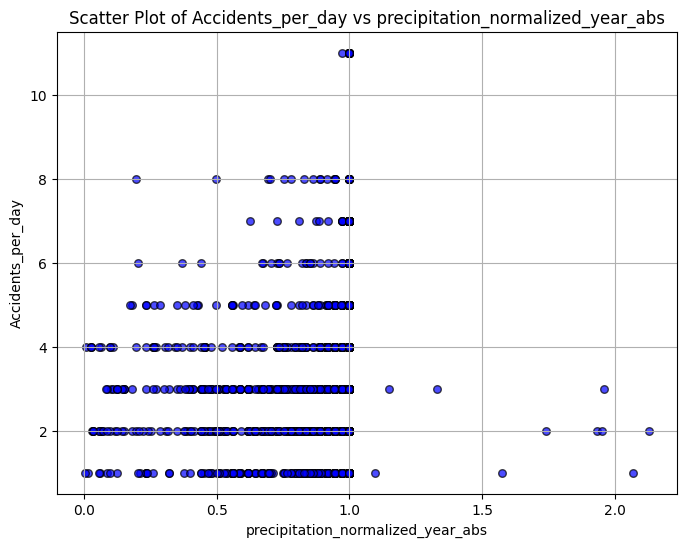

In [ ]:
plot_scatter(dataset, 'temperature_normalized_year', 'Accidents_per_day')
plot_scatter(dataset, 'temperature_normalized', 'Accidents_per_day')
plot_scatter(dataset, 'precipitation_normalized', 'Accidents_per_day')
plot_scatter(dataset, 'precipitation_normalized_year_abs', 'Accidents_per_day')


# IV. Modeling <a id="modeling"></a>

Regression-based methods are used to quantify the causal effect of weather on accident risk.


### Variables chosen : 

For this county, let's do our regressions on the following variables : 

- Wind_Speed 
- Temperature
- Vehicle Year 

### Transformation of the variables

In [ ]:
import numpy as np

# Mapping dictionary
injury_map = {
    'NO APPARENT INJURY': 0,
    'No Apparent Injury': 0,
    'POSSIBLE INJURY': 1,
    'Possible Injury': 1,
    'SUSPECTED MINOR INJURY': 1,
    'Suspected Minor Injury': 1,
    'SUSPECTED SERIOUS INJURY': 2,
    'Suspected Serious Injury': 2,
    'FATAL INJURY': 2,
    'Fatal Injury': 2,
    np.nan: np.nan
}

# Create numeric column
dataset['injury_severity_num'] = dataset['Injury Severity'].map(injury_map)

# Check results
print(dataset[['Injury Severity', 'injury_severity_num']].head(10))


          Injury Severity  injury_severity_num
0      NO APPARENT INJURY                  0.0
1         POSSIBLE INJURY                  1.0
2      NO APPARENT INJURY                  0.0
3         POSSIBLE INJURY                  1.0
4      NO APPARENT INJURY                  0.0
5  SUSPECTED MINOR INJURY                  1.0
6      No Apparent Injury                  0.0
7  Suspected Minor Injury                  1.0
8      No Apparent Injury                  0.0
9      NO APPARENT INJURY                  0.0


In [ ]:
nuage_points(dataset, "temperature_normalized", 'injury_severity_num', couleur='blue', taille=50, alpha=0.6)
nuage_points(dataset, 'injury_severity_num', "temperature_normalized_year", couleur='blue', taille=50, alpha=0.6)
nuage_points(dataset, 'Speed Limit', "injury_severity_num", couleur='blue', taille=50, alpha=0.6)

NameError: name 'nuage_points' is not defined

In [ ]:
print(dataset['injury_severity_num'].value_counts().sort_index())


injury_severity_num
0.0    5290
1.0    1074
2.0      58
Name: count, dtype: int64


Regarder les termes d'interaction. 
On met 100 regressions et on élimine les termes inutiles. Quels facteurs interragissent entre eux

Réfléchir à comment gérer les termes d'interaction. 

=> Avoir une prochaine regression (un peu simple) pour la prochaine fois.

=> Faire la visualisation (dans le rapport) avec les termes croisés importants

=> Interactions d'ordre superieur 

## Regression 

At first we have to make sure to have the right packages 

In [ ]:
#pip install scikit-learn
#pip install statsmodels


In [113]:
def clean_column(df, column_name):
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame")
    df[column_name] = df[column_name].replace([np.inf, -np.inf], np.nan)
    return df.dropna(subset=[column_name])


In [114]:
print(dataset["injury_severity_num"].value_counts(),dataset["temperature"].value_counts())

injury_severity_num
0.0    5290
1.0    1074
2.0      58
Name: count, dtype: int64 temperature
7.911500     3
5.620000     3
10.879001    3
10.268000    3
22.217501    3
            ..
2.283000     1
6.035500     1
21.622499    1
23.695999    1
4.050000     1
Name: count, Length: 6219, dtype: int64


### Centrons et réduisons toutes les variables d'intêret : 

In [115]:
import pandas as pd

def center_and_scale(df, columns):
    """
    Centre et réduit les colonnes numériques d'un DataFrame.
    
    Paramètres
    ----------
    df : pandas.DataFrame
        Dataset d'origine
    columns : list of str
        Noms des colonnes à standardiser
    
    Retour
    ------
    df_scaled : pandas.DataFrame
        Copie du DataFrame avec les colonnes standardisées
    stats : dict
        Moyenne et écart-type utilisés (utile pour interprétation ou inverse transform)
    """
    df_scaled = df.copy()
    stats = {}

    for col in columns:
        mean = df_scaled[col].mean()
        std = df_scaled[col].std()

        # Sécurité : éviter division par zéro
        if std == 0 or pd.isna(std):
            raise ValueError(f"La colonne {col} a un écart-type nul ou invalide.")

        df_scaled[col] = (df_scaled[col] - mean) / std
        stats[col] = {"mean": mean, "std": std}

    return df_scaled, stats


In [116]:
cols_to_scale = [
    'temperature',
    'wind_speed',
    'Vehicle Year',
    'day_or_night_code',
    'Speed Limit', 'temperature_normalized','temperature_normalized_year','temperature_normalized_year_abs','wind_speed_normalized','precipitation_normalized'
]

df_scaled, scaling_stats = center_and_scale(dataset, cols_to_scale)

print(df_scaled["injury_severity_num"].value_counts(),df_scaled["temperature"].value_counts())

injury_severity_num
0.0    5290
1.0    1074
2.0      58
Name: count, dtype: int64 temperature
-0.681490    3
-0.910530    3
-0.384882    3
-0.445953    3
 0.748424    3
            ..
-1.244070    1
-0.869000    1
 0.688952    1
 0.896203    1
-1.067455    1
Name: count, Length: 6219, dtype: int64


In [124]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


def linear_regression_multi(df, explanatory_vars, dependent_var, plot=True):
    """
    Perform a multiple linear regression (OLS) on several columns of a DataFrame
    and optionally plot the regression line for the first explanatory variable.

    Parameters:
    df (pd.DataFrame): Input DataFrame
    explanatory_vars (list of str): List of independent variable column names
    dependent_var (str): Name of the dependent variable column
    plot (bool): Whether to plot the regression line for the first explanatory variable

    Returns:
    model: statsmodels OLS fitted model
    """
    # Clean the dataset for all columns
    for col in explanatory_vars + [dependent_var]:
        df = clean_column(df, col)

    # Select X and y
    X = df[explanatory_vars]
    y = df[dependent_var]

    # Add constant for intercept
    X = sm.add_constant(X)

    # Fit OLS regression
    model = sm.OLS(y, X).fit()

    # Print summary
    print(model.summary())
    
    return model

# Example usage:
explanatory_vars = ["temperature", "Vehicle Year", "wind_speed","day_or_night_code","Speed Limit"]
explanatory_vars_normalized = ["temperature_normalized_year", "Vehicle Year", "wind_speed_normalized","day_or_night_code","Speed Limit"]

dependent_variable = "injury_severity_num"

model = linear_regression_multi(df_scaled, explanatory_vars, dependent_variable, plot=False)
model = linear_regression_multi(df_scaled, explanatory_vars_normalized, dependent_variable, plot=False)


                             OLS Regression Results                            
Dep. Variable:     injury_severity_num   R-squared:                       0.016
Model:                             OLS   Adj. R-squared:                  0.015
Method:                  Least Squares   F-statistic:                     21.00
Date:                 Sun, 28 Dec 2025   Prob (F-statistic):           6.92e-21
Time:                         19:30:25   Log-Likelihood:                -3352.1
No. Observations:                 6422   AIC:                             6716.
Df Residuals:                     6416   BIC:                             6757.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1847

The model explains a relatively small portion of the variance in injury severity, as indicated by an R-squared value of 0.016, suggesting that additional unobserved factors likely contribute to accident severity.

Among the predictors, Speed Limit exhibits the strongest positive association with injury severity (coef. ≈ 0.0485, p < 0.001), indicating that higher speed limits are associated with more severe accidents. Temperature and Vehicle Year also show small but statistically significant positive effects (p < 0.05), suggesting that higher temperatures may slightly increase injury severity. In contrast, wind speed and day/night code do not appear to have a significant effect in this model, with p-values well above conventional significance thresholds.

In these results, both normalized and non-normalized versions of the temperature and wind speed variables yield very similar coefficient estimates and significance levels. The normalization centers the variables relative to their annual averages, facilitating comparison across different time periods. Despite this transformation, the substantive interpretation of the results remains largely unchanged.

### Nouveau type de regression 

In [ ]:
from sklearn.preprocessing import StandardScaler
from statsmodels.miscmodels.ordinal_model import OrderedModel

def run_ordered_logit(
    df,
    y_col,
    x_cols,
    distr='logit',
    standardize=True,
    dropna=True,
    method='bfgs',
    disp=False
):
    """
    Run an ordinal regression model (Ordered Logit or Ordered Probit).

    Parameters
    ----------
    df : pandas.DataFrame
        Input dataset
    y_col : str
        Name of the dependent (ordinal) variable
    x_cols : list of str
        List of explanatory variables
    distr : str
        Distribution to use: 'logit' (default) or 'probit'
    standardize : bool
        Whether to standardize explanatory variables (recommended)
    dropna : bool
        Whether to drop rows with missing values
    method : str
        Optimization method used by statsmodels
    disp : bool
        Whether to display optimization output

    Returns
    -------
    result : statsmodels object
        Fitted ordinal regression results
    """

    # Select relevant columns
    cols = x_cols + [y_col]
    data = df[cols].copy()

    # Drop rows with missing values
    if dropna:
        data = data.dropna()

    # Separate explanatory variables and target variable
    X = data[x_cols]
    y = data[y_col]

    # Standardize explanatory variables
    if standardize:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    # Define the ordinal regression model
    model = OrderedModel(
        y,
        X,
        distr=distr
    )

    # Fit the model
    result = model.fit(method=method, disp=disp)

    return result


In [ ]:
x_vars = [
    'temperature_normalized_year',
    'wind_speed',
    'Vehicle Year',
    'day_or_night_code', 'Speed Limit'
]

x_vars2 = [
    'temperature',
    'wind_speed',
    'Vehicle Year',
    'day_or_night_code', 'Speed Limit'
]


result = run_ordered_logit(
    df=dataset,
    y_col='injury_severity_num',
    x_cols=x_vars
)

print(result.summary())

result = run_ordered_logit(
    df=dataset,
    y_col='injury_severity_num',
    x_cols=x_vars2
)

print(result.summary())


                              OrderedModel Results                             
Dep. Variable:     injury_severity_num   Log-Likelihood:                -3162.2
Model:                    OrderedModel   AIC:                             6338.
Method:             Maximum Likelihood   BIC:                             6386.
Date:                 Sat, 27 Dec 2025                                         
Time:                         15:41:15                                         
No. Observations:                 6422                                         
Df Residuals:                     6415                                         
Df Model:                            5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0867      0.036      2.437      0.015       0.017       0.156
x2            -0.0054      0.034     -0.156

### Matrice de corrélation des variables étudiées

In [ ]:
# Pearson correlation for numeric variables
numeric_cols = ['temperature', 'wind_speed', 'Vehicle Year', 'Speed Limit']
corr_matrix = dataset[numeric_cols].corr()
print(corr_matrix)


              temperature  wind_speed  Vehicle Year  Speed Limit
temperature      1.000000   -0.208855     -0.003153    -0.031168
wind_speed      -0.208855    1.000000     -0.002300    -0.031493
Vehicle Year    -0.003153   -0.002300      1.000000     0.050146
Speed Limit     -0.031168   -0.031493      0.050146     1.000000


In [ ]:
cols_to_scale = [
    'temperature',
    'wind_speed',
    'Vehicle Year',
    'day_or_night_code',
    'Speed Limit', 'temperature_normalized','temperature_normalized_year','temperature_normalized_year_abs',"Accidents_per_day"
]

df_scaled, scaling_stats = center_and_scale(dataset, cols_to_scale)

print(df_scaled["injury_severity_num"].value_counts(),df_scaled["temperature"].value_counts())

injury_severity_num
0.0    5290
1.0    1074
2.0      58
Name: count, dtype: int64 temperature
-0.681490    3
-0.910530    3
-0.384882    3
-0.445953    3
 0.748424    3
            ..
-1.244070    1
-0.869000    1
 0.688952    1
 0.896203    1
-1.067455    1
Name: count, Length: 6219, dtype: int64


In [ ]:
experiment_3 = ["temperature", "Vehicle Year", "wind_speed","day_or_night_code","Speed Limit","precipitation"]
experiment_4 = ["temperature_normalized", "Vehicle Year", "wind_speed","day_or_night_code","Speed Limit","precipitation"]

dependent_variable2 = "Accidents_per_day"

model = linear_regression_multi(df_scaled, experiment_3, dependent_variable2, plot=False)
model = linear_regression_multi(df_scaled, experiment_4, dependent_variable2, plot=False)


                            OLS Regression Results                            
Dep. Variable:      Accidents_per_day   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     7.859
Date:                Sat, 27 Dec 2025   Prob (F-statistic):           1.87e-08
Time:                        15:57:54   Log-Likelihood:                -9183.5
No. Observations:                6489   AIC:                         1.838e+04
Df Residuals:                    6482   BIC:                         1.843e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0069      0.01

In [ ]:
x_vars = [
    'temperature_normalized_year',
    'wind_speed',
    'Vehicle Year',
    'day_or_night_code', 'Speed Limit'
]

x_vars2 = [
    'temperature',
    'wind_speed',
    'Vehicle Year',
    'day_or_night_code', 'Speed Limit'
]


result = run_ordered_logit(
    df=dataset,
    y_col='Accidents_per_day',
    x_cols=x_vars
)

print(result.summary())

result = run_ordered_logit(
    df=dataset,
    y_col='Accidents_per_day',
    x_cols=x_vars2
)

print(result.summary())


                             OrderedModel Results                             
Dep. Variable:      Accidents_per_day   Log-Likelihood:                -11140.
Model:                   OrderedModel   AIC:                         2.231e+04
Method:            Maximum Likelihood   BIC:                         2.239e+04
Date:                Sat, 27 Dec 2025                                         
Time:                        15:59:22                                         
No. Observations:                6489                                         
Df Residuals:                    6476                                         
Df Model:                           5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0736      0.023     -3.134      0.002      -0.120      -0.028
x2             0.0074      0.023      0.321      0.7